-----
# 02 - Unibiomarker Analysis

-----
# 02 - Unibiomarker Analysis

In [1]:
from pathlib import Path
import seaborn as sns
import pandas as pd

from utils import format_dataframe, add_ratio_columns
from unibiomarker import Unibiomarker
import constants

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Default Plot Style : 
sns.set(style="whitegrid")


## 1. Data Loading & Preparation

In [2]:
# Set path to Data Directory : 
DIR_DATA = Path.cwd() / "data"

# Check existence to training/test files : 
print(fr"Data Directory    : {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory    : C:\Users\maichi\work\my_projects\CercareStatAnalysis\data
Train Data exists : True
Test Data exists  : True


In [3]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)

# Format dataframes : 
df_data = format_dataframe(df=df_data)
df_test = format_dataframe(df=df_test)

# Add the ratio columns : 
add_ratio_columns(df_data)
add_ratio_columns(df_test)

print("Data Loaded and formatted Successfully ! ")


Data Loaded and formatted Successfully ! 


##  2. 🔧  Configuration 

In [4]:
BIOMARKER = "OEF"  # Choose from :  ADC, CBV_corr, CBV_noncorr, DELAY, CTH, CTH MAX, OEF, rLEAKAGE, rCMRO2, COV

In [5]:
# Unibiomarker object Initialization : 
ub = Unibiomarker(name=BIOMARKER, data = df_data, test_data=df_test)
print(ub)


Biomarker object
- Parameters: OEF_lésion, OEF_control, OEF_ratio
- Training samples: 182
- Test samples: 23



## 3. Descriptive Analysis

### 3.1 Check for missing values

Fully usable rows in train: 180/182 (98.9%)
Fully usable rows in test:  23/23 (100.0%)


,Train Missing %,Test Missing %
OEF_lésion,0.5,0.0
OEF_control,1.1,0.0
OEF_ratio,1.1,0.0


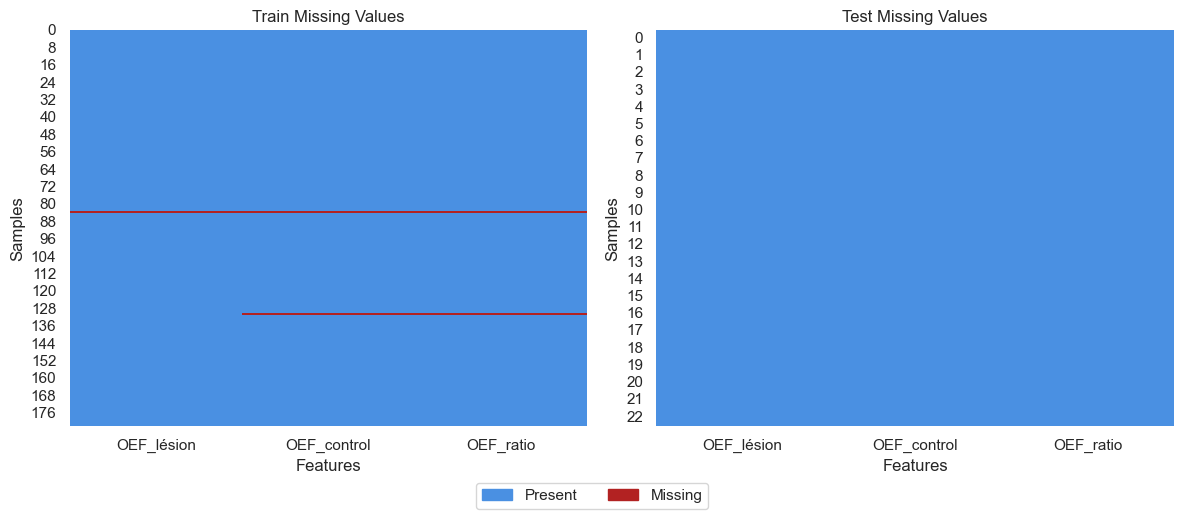

In [6]:
ub.check_missing_data()


### 3.2 Describe & Visualize key features

In [7]:
ub.describe_features(features=[ub.path, ub.control])


Overall Descriptive Statistics : 


,count,mean,std,min,25%,50%,75%,max
OEF_lésion,181.0,0.637646,0.80648,0.01,0.10,0.310,0.73,3.59
OEF_control,180.0,0.735833,0.98726,0.01,0.21,0.445,0.90,9.34



Descriptive Statistics by 'Diagnosis' Class:


,Feature,Class,count,mean,std,min,25%,50%,75%,max
0,OEF_lésion,0,110.0,0.195945,0.208582,0.01,0.050,0.135,0.2775,1.59
2,OEF_lésion,1,71.0,1.321972,0.907283,0.26,0.475,1.100,2.0500,3.59
1,OEF_control,0,109.0,0.951651,0.844779,0.12,0.380,0.630,1.3300,4.77
3,OEF_control,1,71.0,0.404507,1.098848,0.01,0.120,0.200,0.4200,9.34


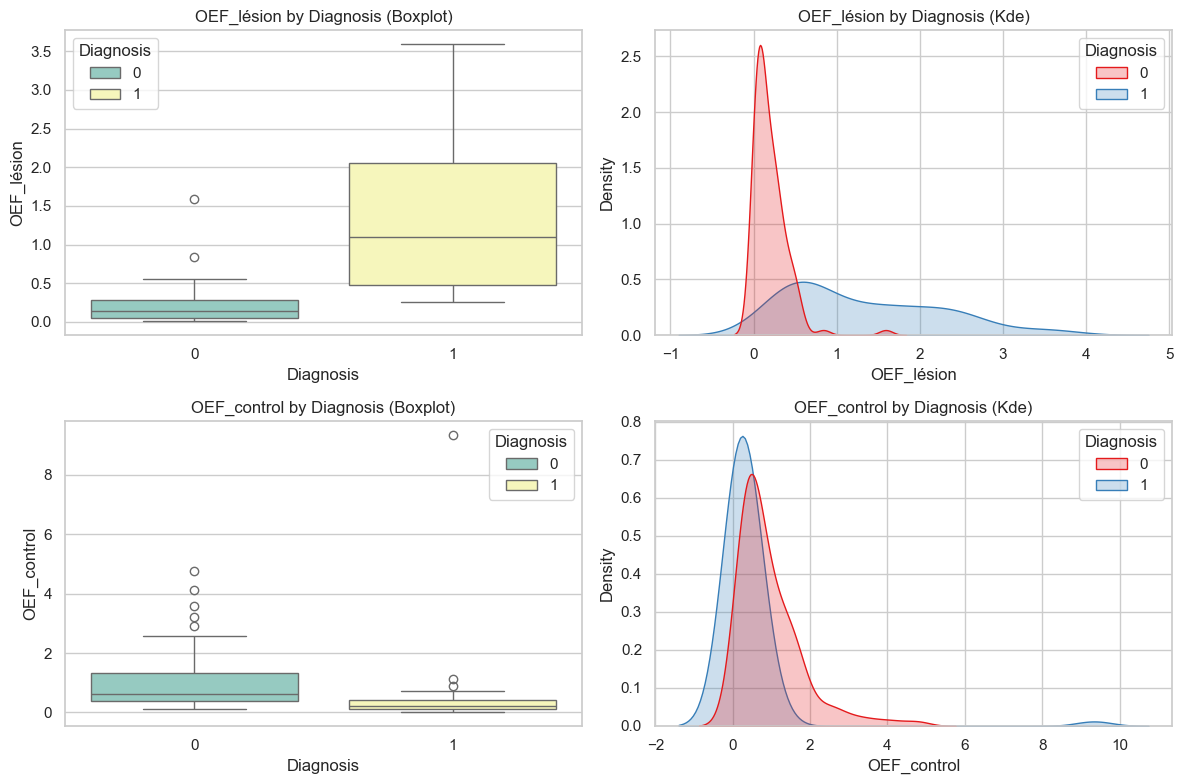

In [8]:
ub.plot_feature_distributions(features=[ub.path, ub.control], plots=["boxplot", "kde"])


### 3.3 Ratio Analysis

The goal of this section is to check correlation between the path variable and the control variable

The ratio is defined as:  
**`Ratio = Path / Control`**

To assess whether this ratio provides *new, meaningful information*, we first examine the correlation between `Path` and `Control` values:

---

#### 🔍 What we check

1. **Pearson correlation** (linear relationship)  
   Measures the strength of a **linear** association between `Path` and `Control`.

   $$
   r = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
   $$

2. **Spearman correlation** (monotonic relationship)  
   Applies the Pearson formula to the **ranked values** rather than raw values.

   $$
   \rho = \frac{\text{Cov}(\text{Rank}(X), \text{Rank}(Y))}{\sigma_{\text{Rank}(X)} \cdot \sigma_{\text{Rank}(Y)}}
   $$

   This makes Spearman suitable for detecting **monotonic relationships** that are not necessarily linear.

3. **Statistical significance** (p-values)  
   For both Pearson and Spearman, a **p-value** tests the null hypothesis that the correlation is zero (i.e., no association exists):

   - A **low p-value** (typically < 0.05) indicates that the correlation is **statistically significant**  
   - A **high p-value** means there is **insufficient evidence** to conclude that a statistically significant correlation exists
     

In [9]:
ub.describe_features(features=[ub.ratio])

Overall Descriptive Statistics : 


,count,mean,std,min,25%,50%,75%,max
OEF_ratio,180.0,2.642729,4.415833,0.022222,0.149537,0.308352,3.839286,34.0



Descriptive Statistics by 'Diagnosis' Class:


,Feature,Class,count,mean,std,min,25%,50%,75%,max
0,OEF_ratio,0,109.0,0.259605,0.456320,0.022222,0.111111,0.175439,0.286517,4.416667
1,OEF_ratio,1,71.0,6.301329,5.207871,0.248394,3.322931,4.333333,6.603896,34.000000


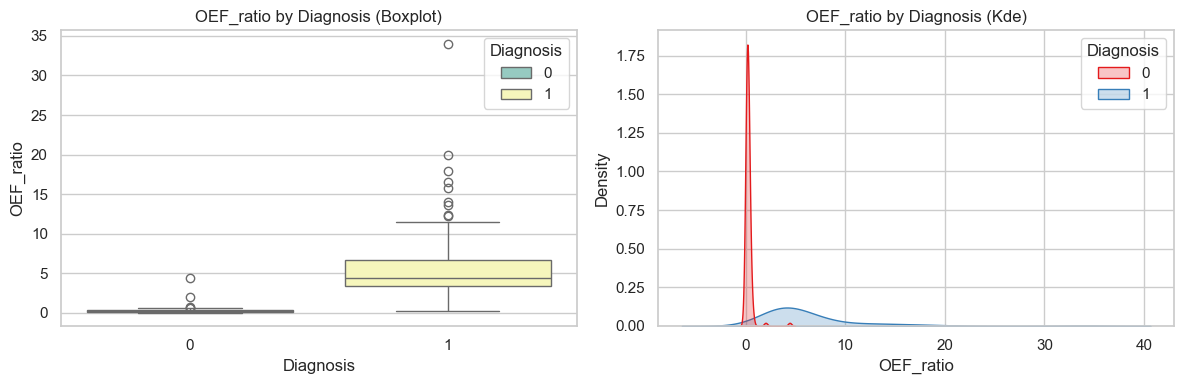

In [10]:
ub.plot_feature_distributions(features=[ub.ratio], plots=["boxplot", "kde"])

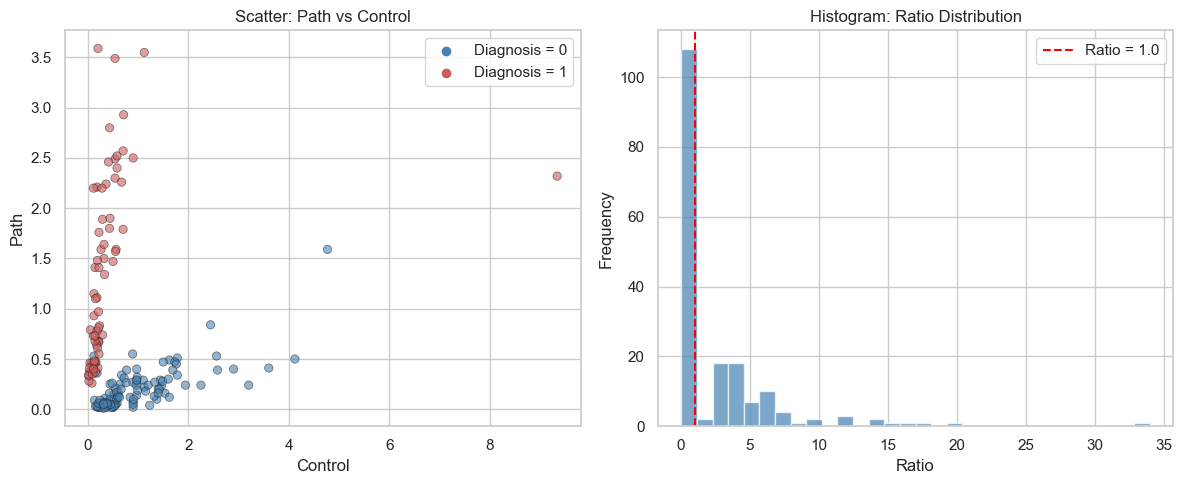

In [11]:
ub.plot_diagnostic_scatter_and_ratio()

In [12]:
ub.evaluate_path_control_correlation()

🔍 Analyzing Biomarker: OEF
------------------------------------------------------------------------------------------------------------------------------------------------------
--- Step 1: Correlation Analysis between Path and Control 
------------------------------------------------------------------------------------------------------------------------------------------------------
- Pearson  correlation: r = 0.051, p = 0.4927
- Spearman correlation: r = -0.090, p = 0.2272

------------------------------------------------------------------------------------------------------------------------------------------------------
--- Step 2: Interpretation Guidance 
------------------------------------------------------------------------------------------------------------------------------------------------------
Neither Pearson nor Spearman correlation is statistically significant ! 
No clear association between Path and Control ! 
The ratio is a worthwhile feature to explore ! 


## 4.  Discriminative Power of the Biomarker


In this section, we assess whether features like `path` and `ratio` can **discriminate between diagnostic groups**, such as Tumor Recurrence and Radiation Necrosis.

---

#### Step 1 – Normality Check

We start with **Q–Q plots** to visually evaluate whether the distribution of the feature within each group appears **approximately normal**. This helps decide whether we can meaningfully apply a parametric test that models the **data distribution**.

---
#### Step 2 – Choosing the Right Statistical Test

- If the feature appears **normally distributed** in each group, we apply a **Welch’s t-test**.
  - This test assumes the data follows a normal distribution and compares the **means** between groups.
  - Using a parametric test like this is valuable because it lets us **model the data with a known distribution**

- If the feature **does not appear normally distributed**, we instead use the **Mann–Whitney U test**.
  - This is a **non-parametric** test that compares whether values in one group tend to be higher or lower than in the other.
  - It doesn’t assume any specific distribution and works on **ranked data** rather than actual values.
  - But it doesn’t let us **model or describe the underlying distribution** of the data 

---

#### Step 3 – Interpreting the Results

If either test reports a **statistically significant difference** (typically p < 0.05), it suggests that the feature behaves differently between groups — a necessary condition for it to be useful as a biomarker

### 4.1. Distribution Differences: Path Feature

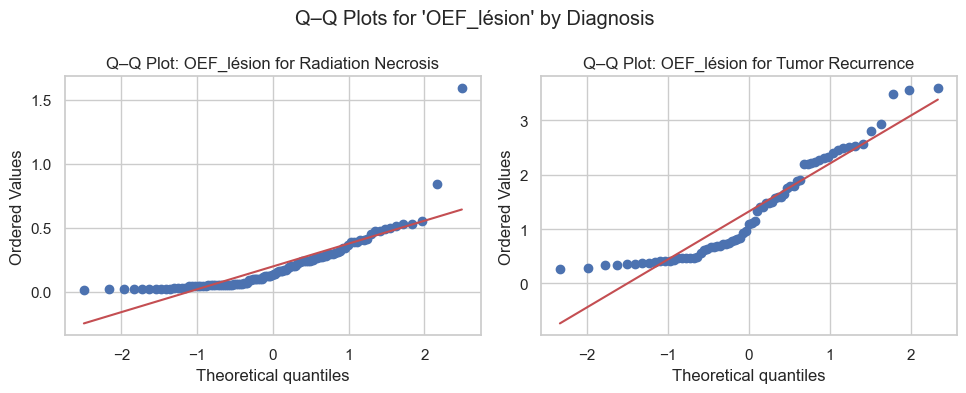

In [13]:
ub.plot_qq_by_group(feature=ub.path)

In [14]:
ub.test_group_difference(feature=ub.path)

Group Comparison Results:
----------------------------------------------------------------------------------------------------
Welch’s t-test       → statistic = -10.2837, p = 0.0000   → ✅ Significant difference
Mann–Whitney U test  → statistic = 323.5000, p = 0.0000   → ✅ Significant difference



🔎 [ROC-Based Classification] Feature: 'OEF_lésion'
--------------------------------------------------------------------------------
AUC (Train) : 0.959  (95% CI: 0.934 – 0.983)
AUC (Test)  : 0.670  (95% CI: 0.362 – 0.978)

 Optimal threshold (Youden’s J): 0.330
 Classification Rule          : Class = 1 if OEF_lésion ≥ 0.330

▶ TRAIN SET METRICS AT THRESHOLD: 0.330
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      87.8
Recall (Sensitivity) |      97.2
Specificity          |      81.8
Precision            |      77.5
F1 Score             |      86.3

▶ TEST SET METRICS AT THRESHOLD: 0.330
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      39.1
Recall (Sensitivity) |      85.7
Specificity          |      18.8
Precision            |      31.6
F1 Score             | 

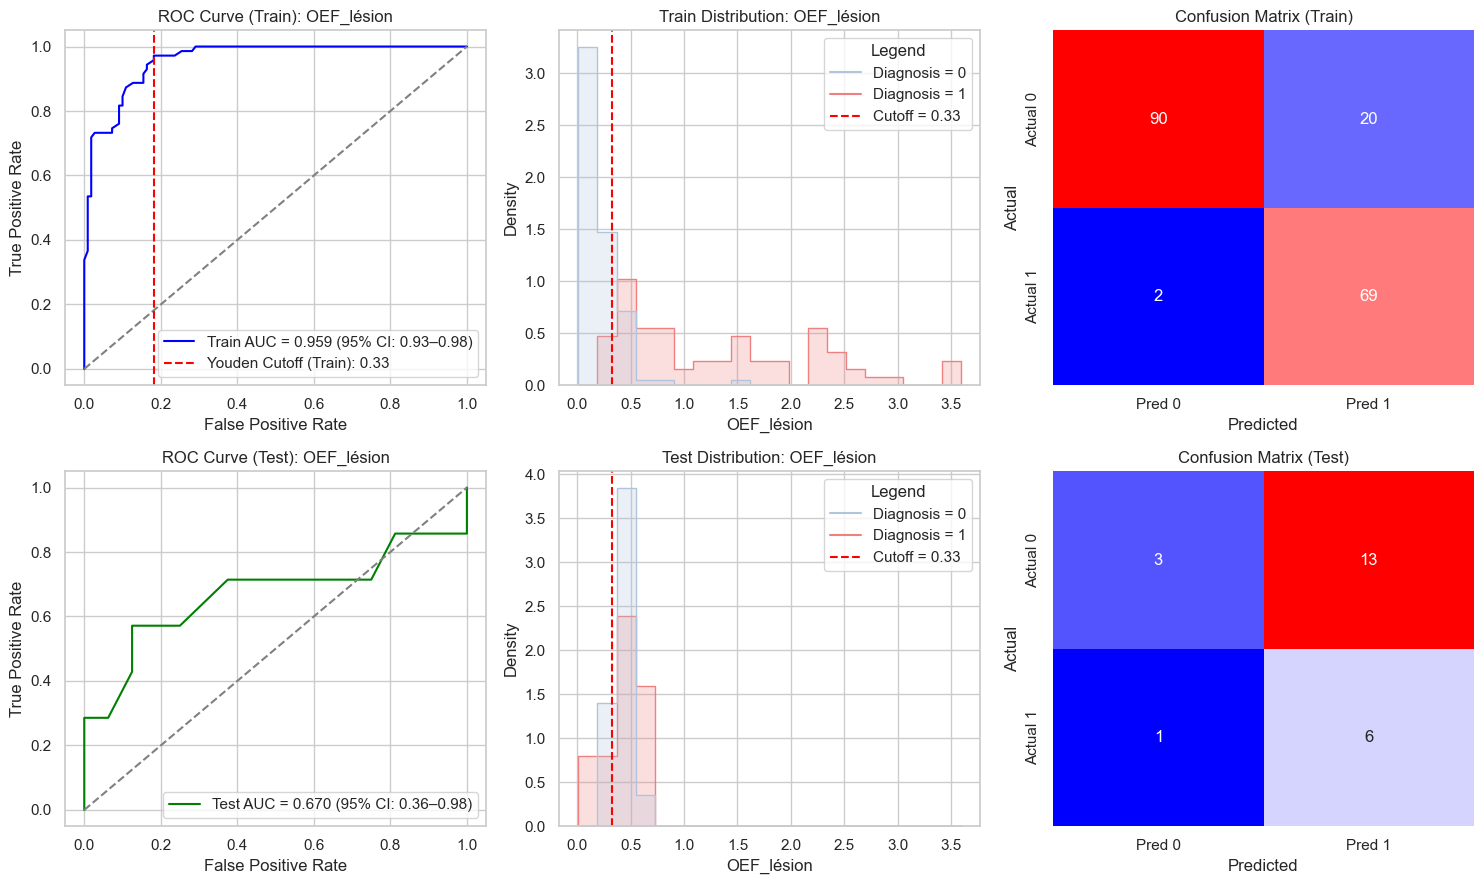

In [15]:
ub.evaluate_feature_predictive_power(feature=ub.path, target_bin_count=20)

### 4.2. Distribution Differences: Path Feature

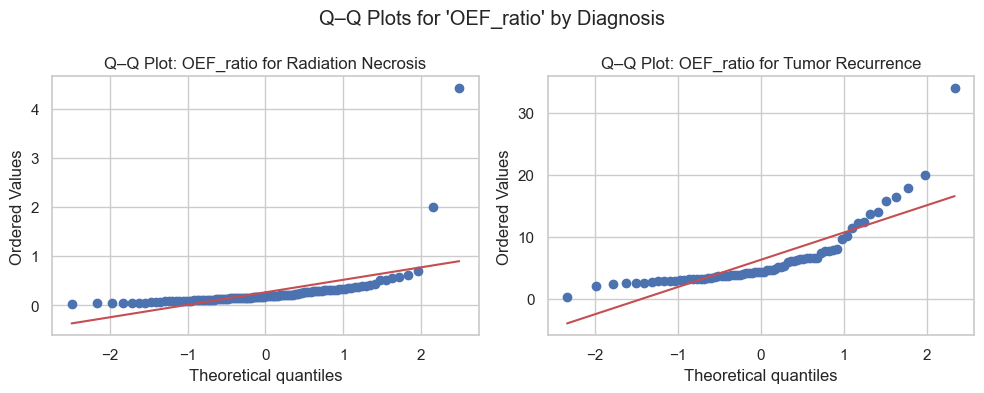

In [16]:
ub.plot_qq_by_group(feature=ub.ratio)

In [17]:
ub.test_group_difference(feature=ub.ratio)

Group Comparison Results:
----------------------------------------------------------------------------------------------------
Welch’s t-test       → statistic = -9.7509, p = 0.0000   → ✅ Significant difference
Mann–Whitney U test  → statistic = 72.0000, p = 0.0000   → ✅ Significant difference



🔎 [ROC-Based Classification] Feature: 'OEF_ratio'
--------------------------------------------------------------------------------
AUC (Train) : 0.991  (95% CI: 0.978 – 1.000)
AUC (Test)  : 0.643  (95% CI: 0.328 – 0.958)

 Optimal threshold (Youden’s J): 2.050
 Classification Rule          : Class = 1 if OEF_ratio ≥ 2.050

▶ TRAIN SET METRICS AT THRESHOLD: 2.050
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      98.9
Recall (Sensitivity) |      98.6
Specificity          |      99.1
Precision            |      98.6
F1 Score             |      98.6

▶ TEST SET METRICS AT THRESHOLD: 2.050
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      78.3
Recall (Sensitivity) |      28.6
Specificity          |     100.0
Precision            |     100.0
F1 Score             |   

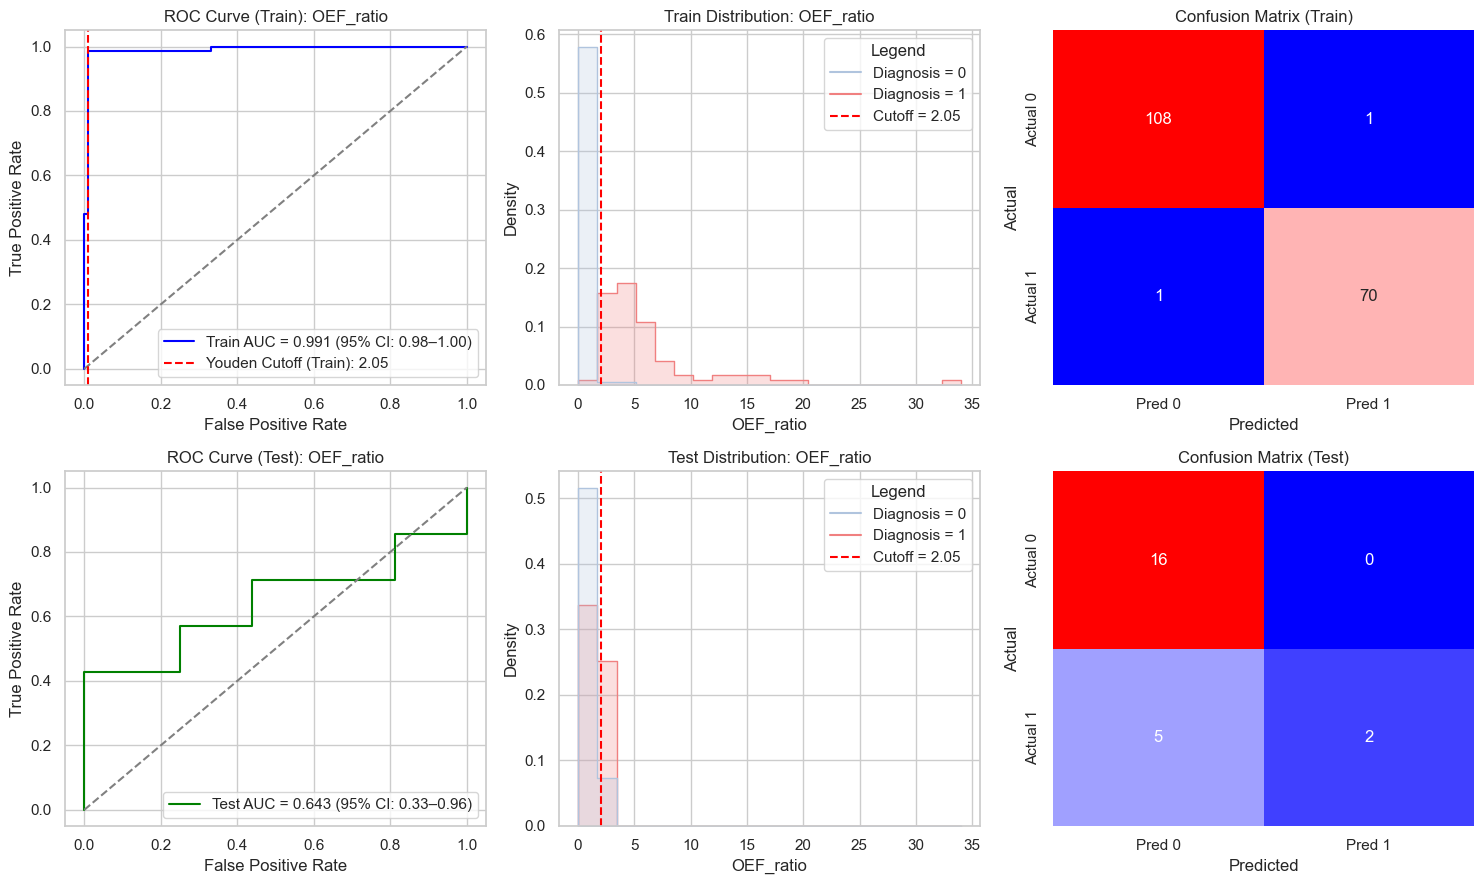

In [18]:
ub.evaluate_feature_predictive_power(feature=ub.ratio, target_bin_count=20)

## 5.  Logistic Regression Modelling

### 5.1 Univariate Logistic Regression 


Logistic Regression Summary for Feature: OEF_lésion
----------------------------------------------------------------------------------------------------
Log-Odds Coefficient : 7.3682
Odds Ratio           : 1584.8281
Youden's J Threshold : 0.2231
----------------------------------------------------------------------------------------------------

--- Inference Using statsmodels ---
Odds Ratio (statsmodels)  : 1584.8248
95% CI for OR             : (125.4997, 20013.3596)
p-value                   : 1.2355e-08
----------------------------------------------------------------------------------------------------

▶ [OEF_LÉSION] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      85.6
Recall (Sensitivity) |      73.2
Specificity          |      93.6
Precision            |      88.1
F1 Score             |      80.0

▶ [OEF_LÉSION] TRAIN @ YOUDEN
--------------------------

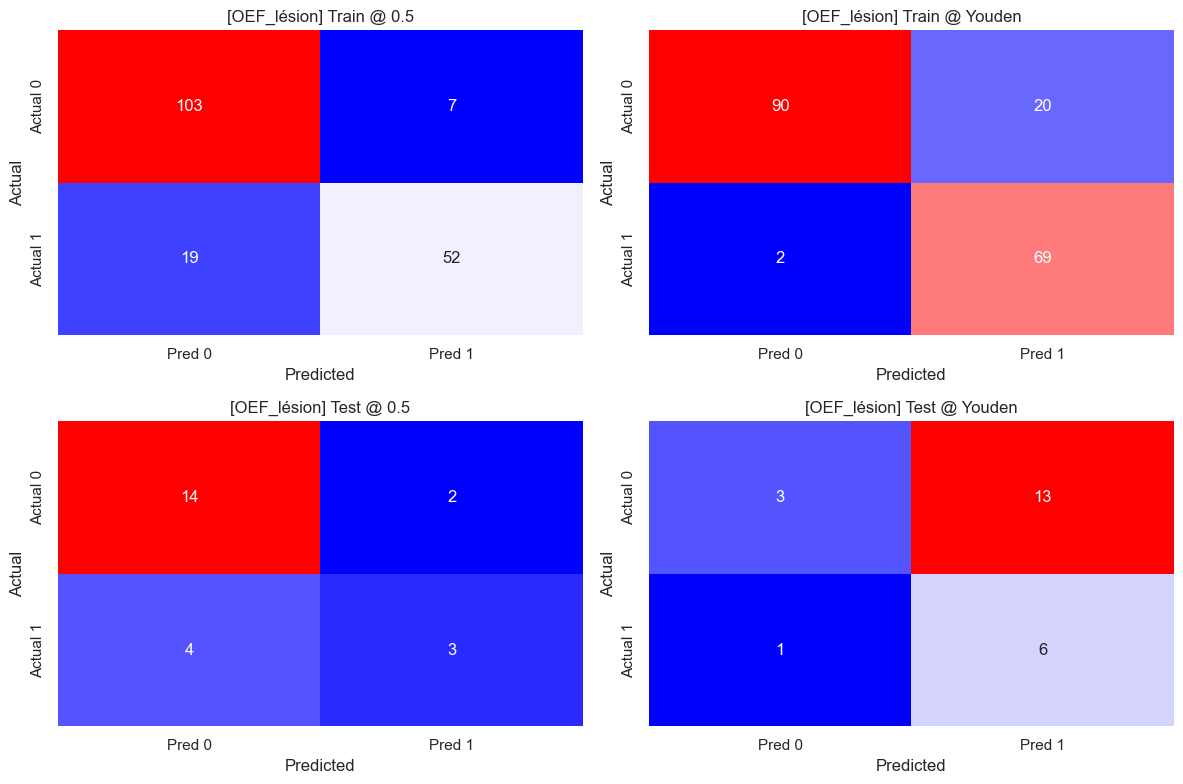

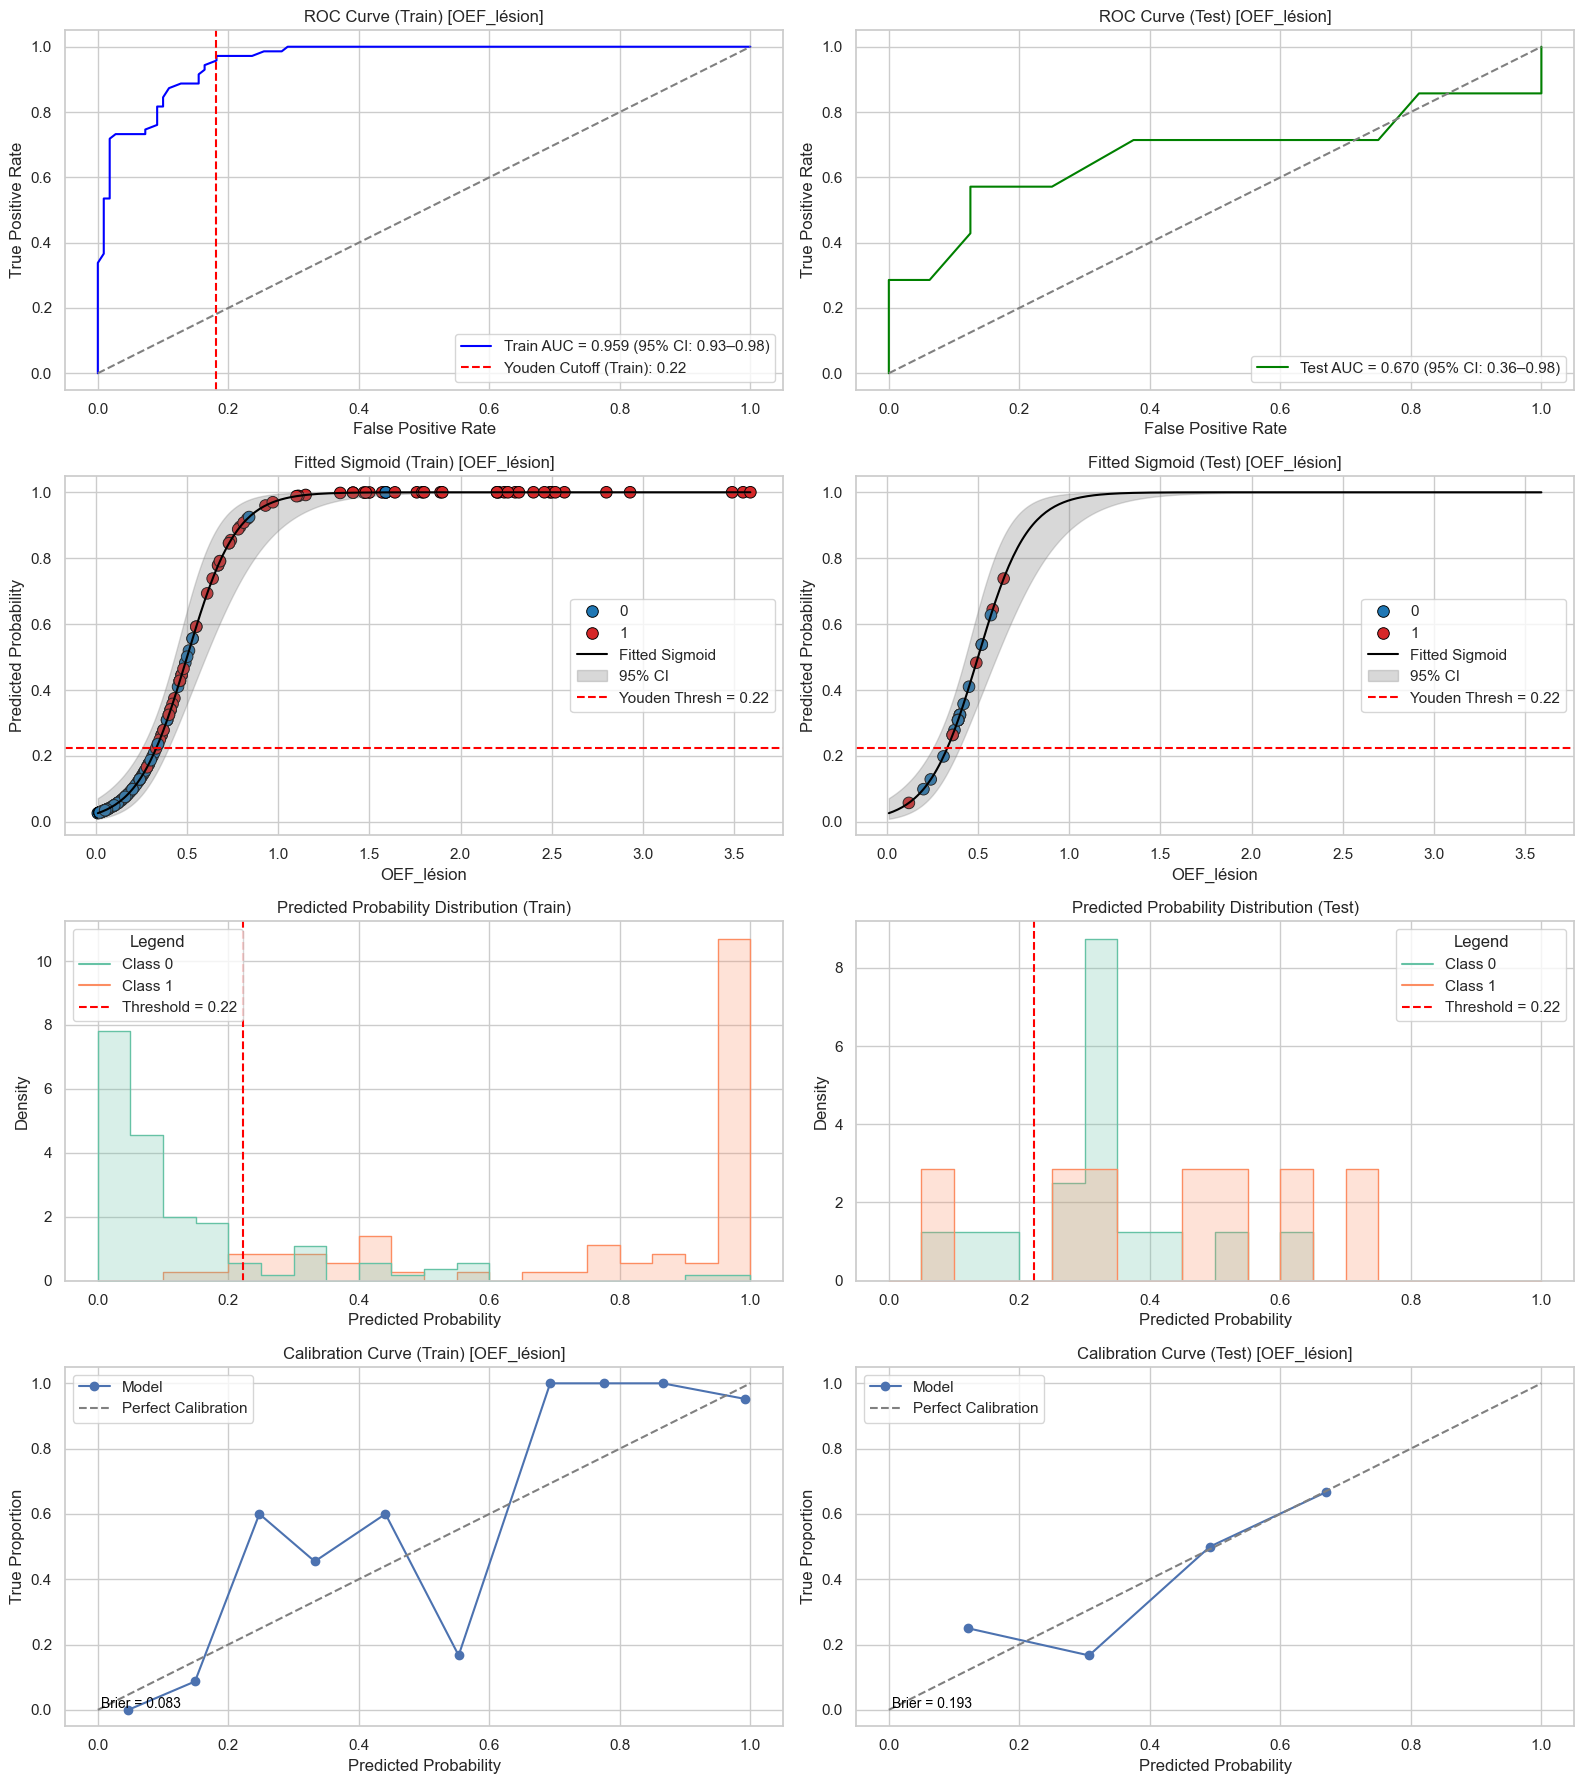

In [19]:
ub.evaluate_logistic_univariate_model(feature=ub.path, target_bin_count=20)


Logistic Regression Summary for Feature: OEF_ratio
----------------------------------------------------------------------------------------------------
Log-Odds Coefficient : 2.4915
Odds Ratio           : 12.0797
Youden's J Threshold : 0.5770
----------------------------------------------------------------------------------------------------

--- Inference Using statsmodels ---
Odds Ratio (statsmodels)  : 12.0797
95% CI for OR             : (5.2784, 27.6444)
p-value                   : 3.6695e-09
----------------------------------------------------------------------------------------------------

▶ [OEF_RATIO] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      98.3
Recall (Sensitivity) |      98.6
Specificity          |      98.2
Precision            |      97.2
F1 Score             |      97.9

▶ [OEF_RATIO] TRAIN @ YOUDEN
--------------------------------------

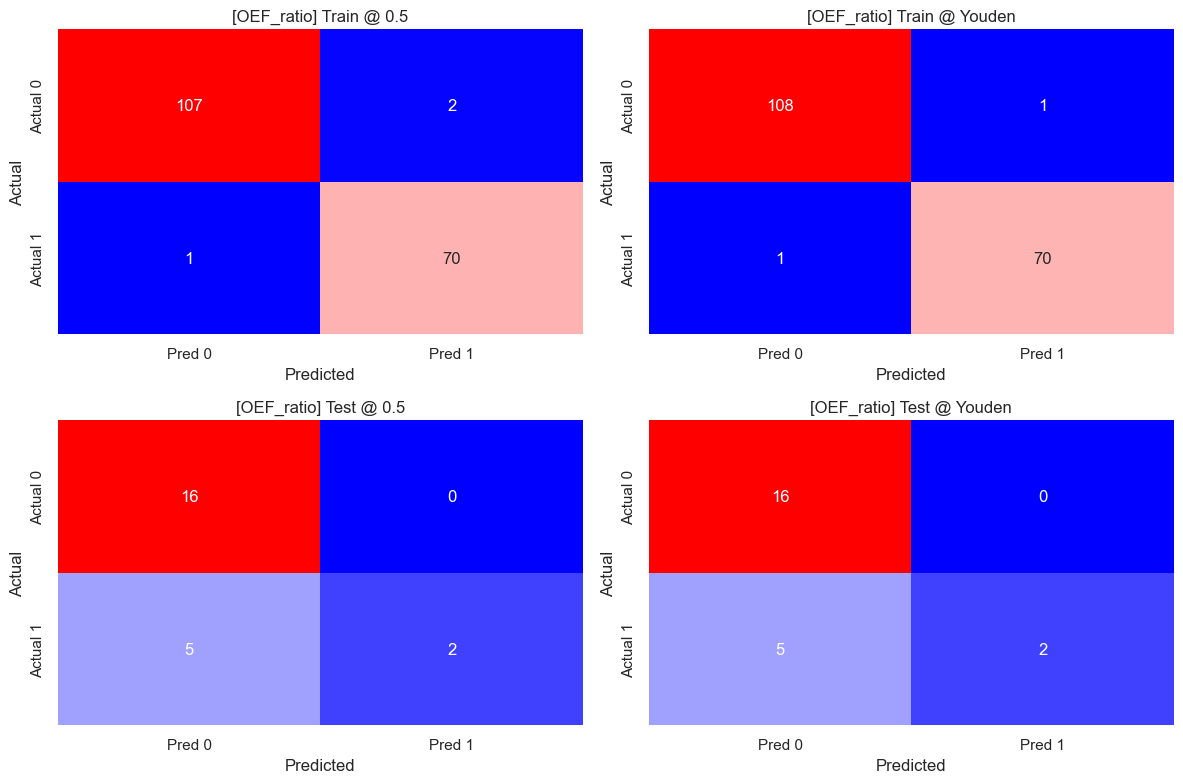

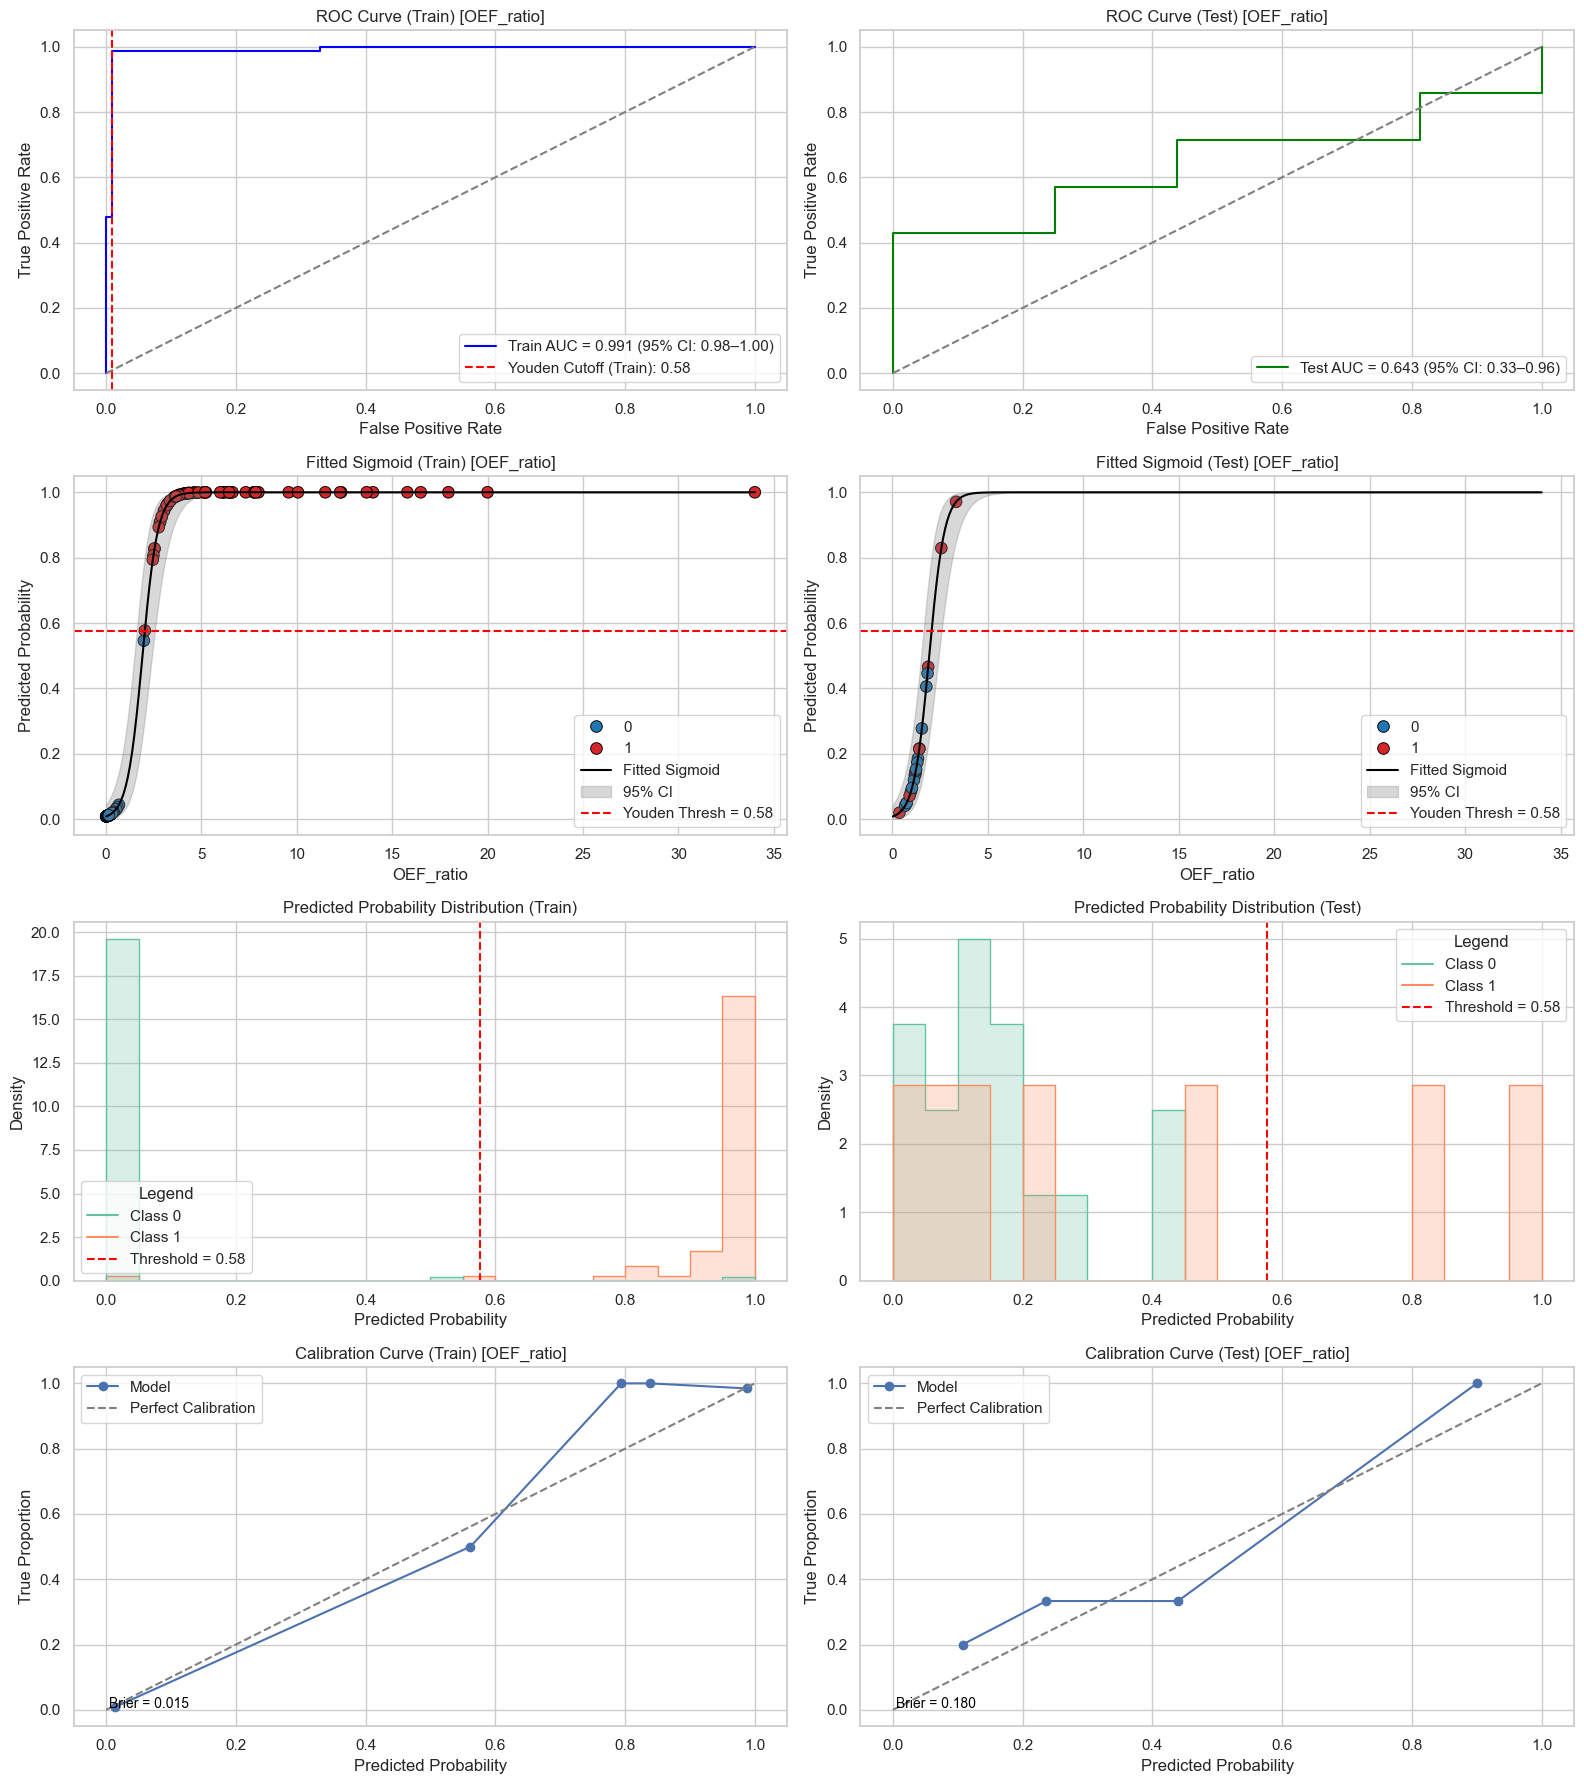

In [20]:
ub.evaluate_logistic_univariate_model(feature=ub.ratio,  target_bin_count=20)

### 5.2 Bivariate Logistic Regression 

BIVARIATE LOGISTIC REGRESSION: OEF_lésion + OEF_control
----------------------------------------------------------------------------------------------------
AUC (Train): 0.993 (95% CI: 0.984 – 1.000)
AUC (Test) : 0.696 (95% CI: 0.378 – 1.000)
Optimal Threshold (Youden’s J): 0.179

--- Inference Using statsmodels ---
Adjusted ORs per +1 SD (Training scale)
Odds Ratio (OEF_lésion)     : 437210.5640
95% CI for OR (OEF_lésion)  : (2578.8838, 74122408.5656)
p-value (OEF_lésion)        : 7.0750e-07
Standard Deviation (OEF_lésion) used for scaling: 0.805478
Odds Ratio (OEF_control)     : 0.0271
95% CI for OR (OEF_control)  : (0.0066, 0.1114)
p-value (OEF_control)        : 5.6058e-07
Standard Deviation (OEF_control) used for scaling: 0.984514

▶ [OEF_LÉSION + OEF_CONTROL] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      96.1
Recall (Sensitivity) |      95.8
Specificity

C:\Users\maichi\work\my_projects\CercareStatAnalysis\unibiomarker.py:367: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_sd = float(logit_model.params[idx])
C:\Users\maichi\work\my_projects\CercareStatAnalysis\unibiomarker.py:373: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval     = float(pvals[idx])


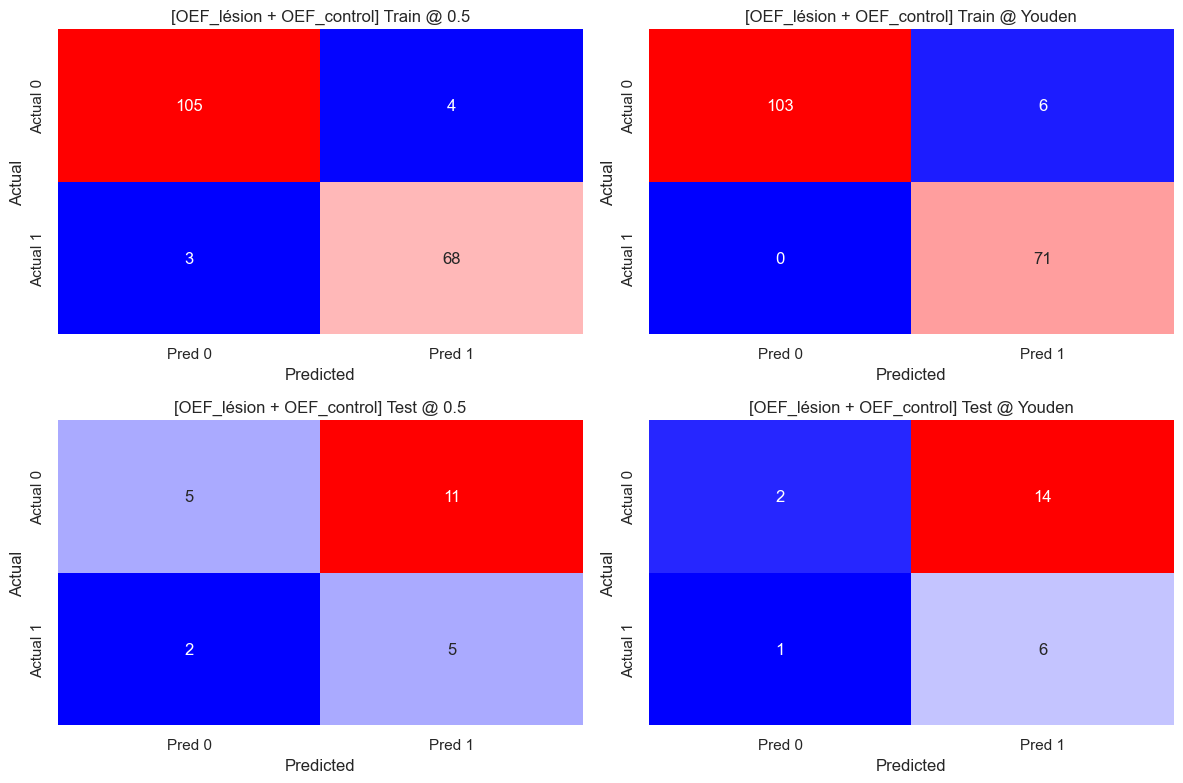

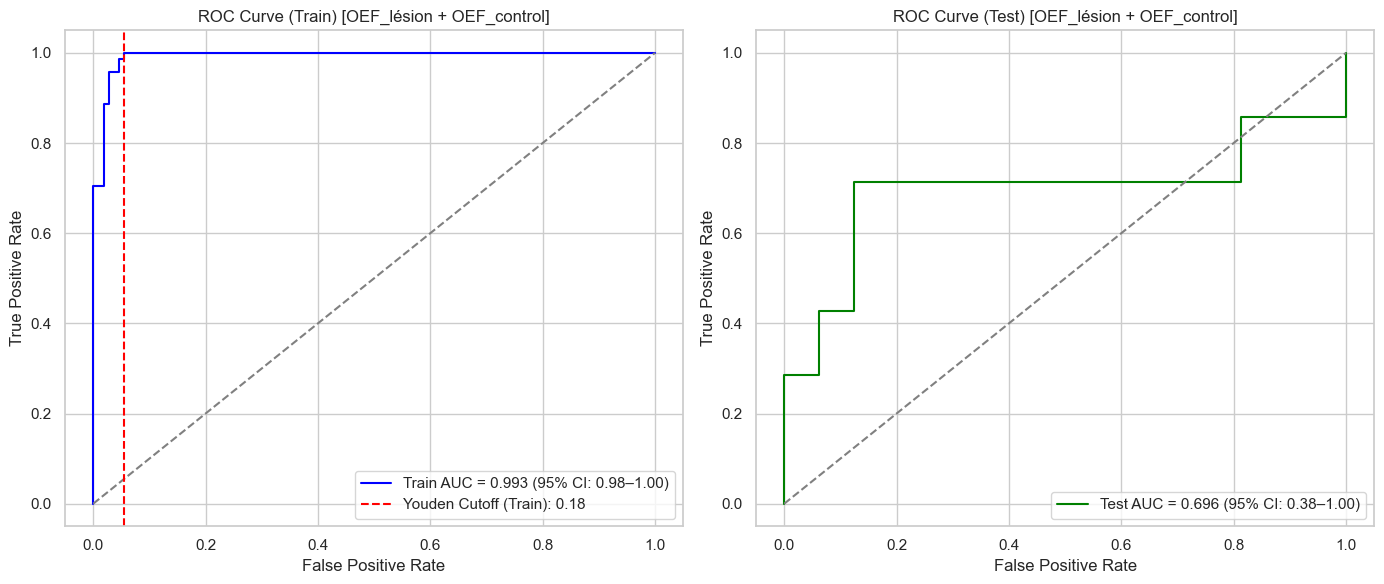

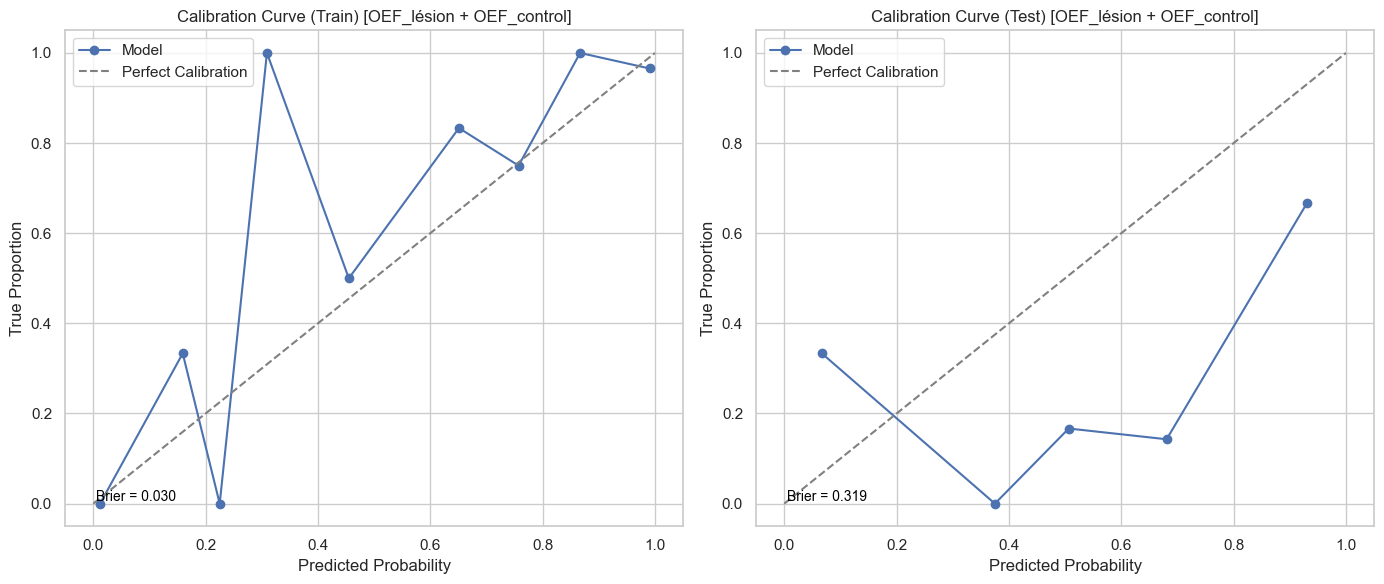

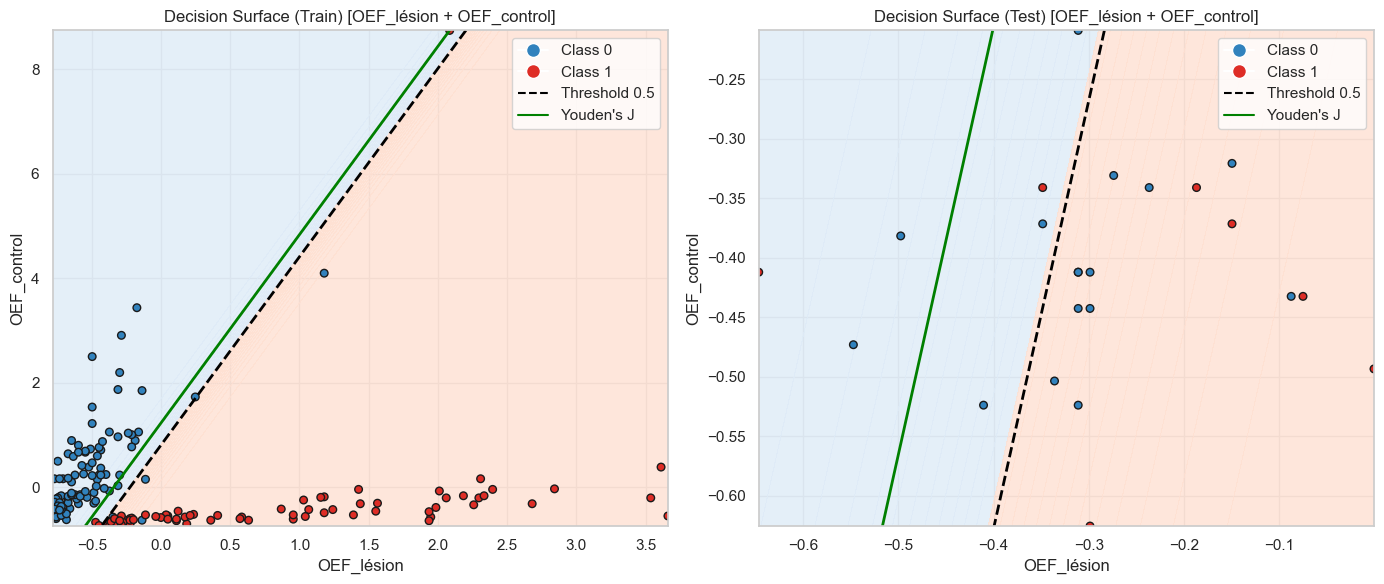

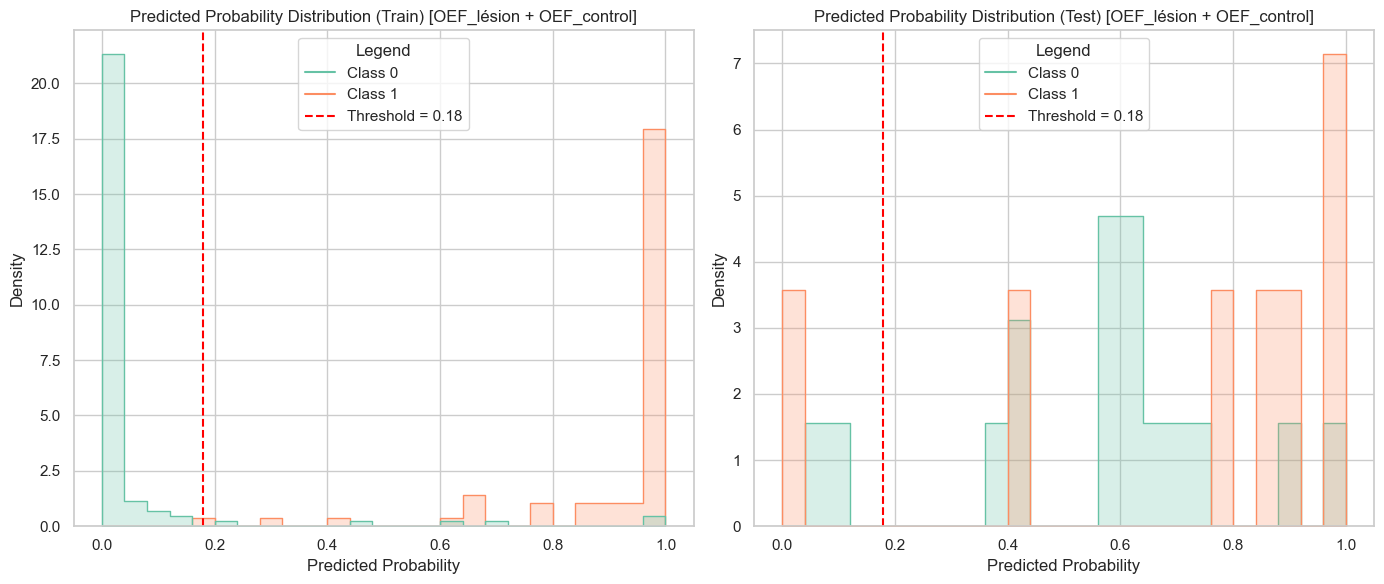

In [21]:
ub.evaluate_logistic_bivariate_model(target_bin_count=25)

## 5.  SVM Modelling

SVM (LINEAR) BIVARIATE: OEF_lésion + OEF_control
----------------------------------------------------------------------------------------------------
[Margin] Train AUC : 0.983 (95% CI: 0.956 – 1.000)
[Margin] Test  AUC : 0.696 (95% CI: 0.378 – 1.000)
Optimal Margin Cutoff (Youden): 0.086
----------------------------------------------------------------------------------------------------
[Proba]  Train AUC : 0.983 (95% CI: 0.956 – 1.000)
[Proba]  Test  AUC : 0.696 (95% CI: 0.378 – 1.000)
Optimal Proba  Cutoff (Youden): 0.401

▶ [OEF_LÉSION + OEF_CONTROL] TRAIN @ F(X) ≥ 0
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      97.8
Recall (Sensitivity) |      98.6
Specificity          |      97.2
Precision            |      95.9
F1 Score             |      97.2

▶ [OEF_LÉSION + OEF_CONTROL] TRAIN @ F(X) ≥ YOUDEN
--------------------------------------------------
Metric            

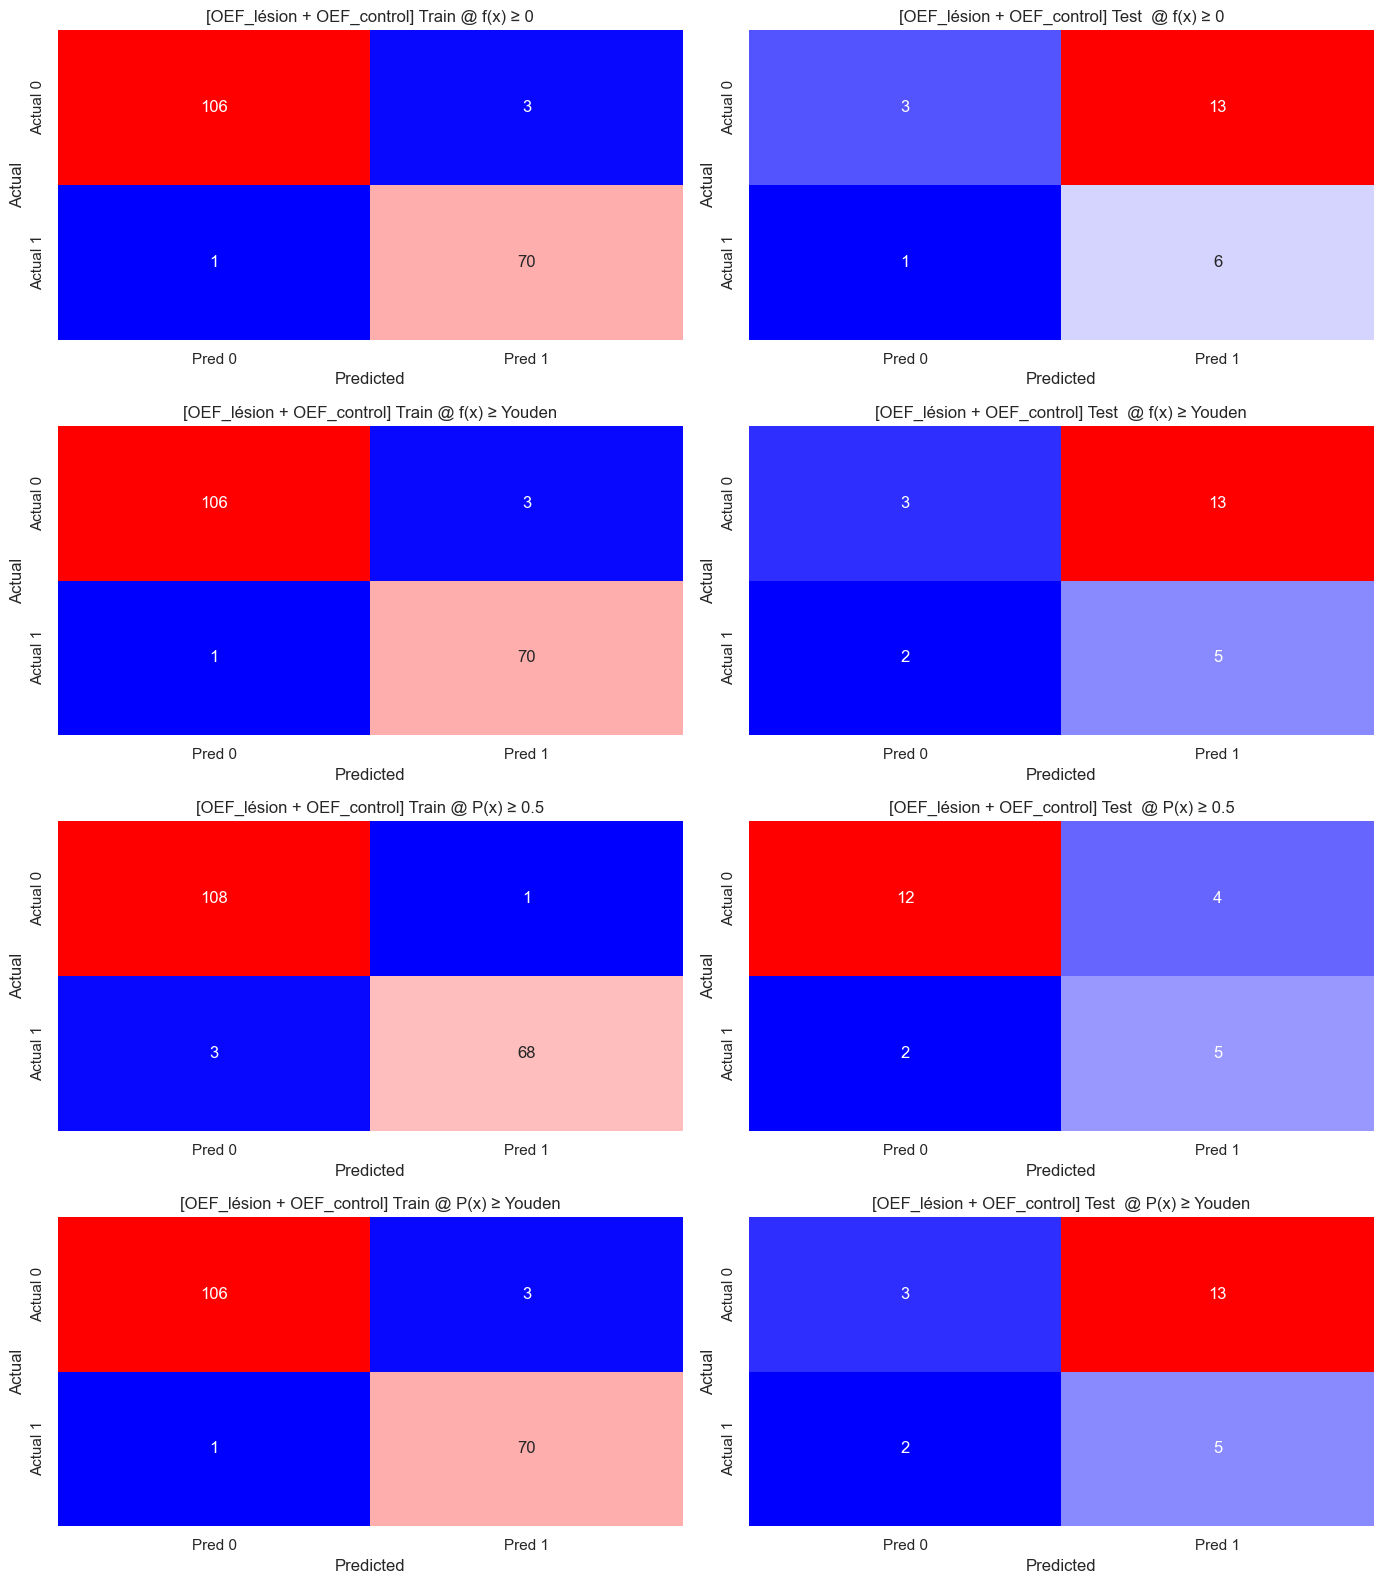

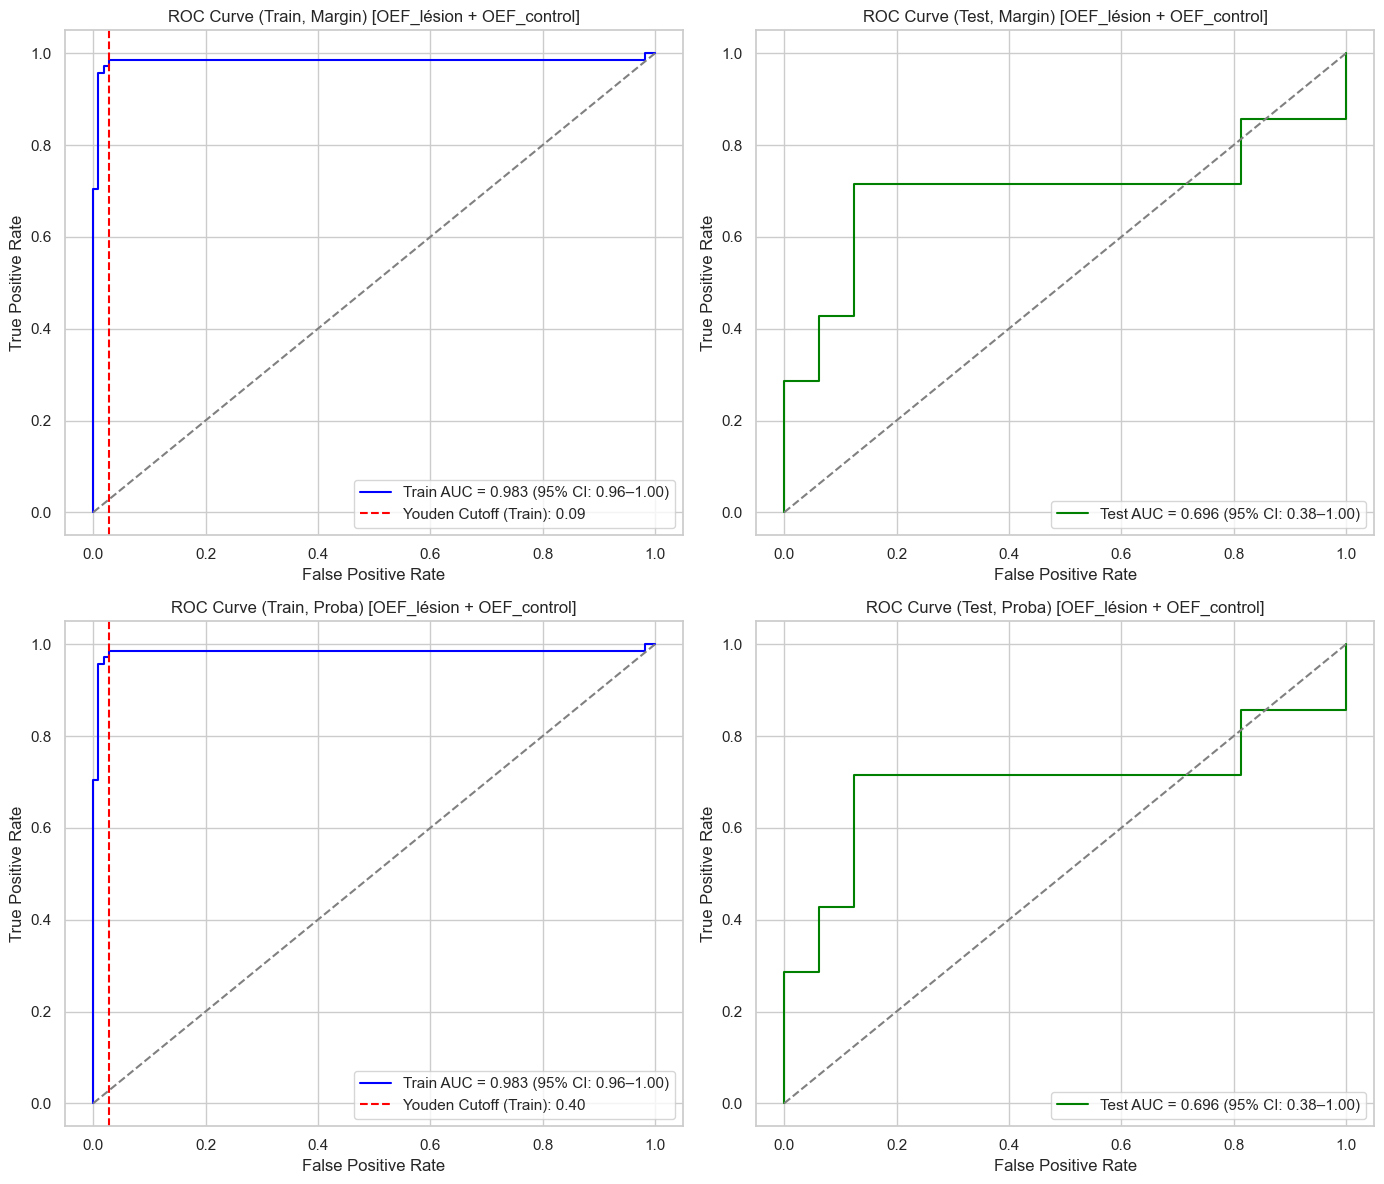

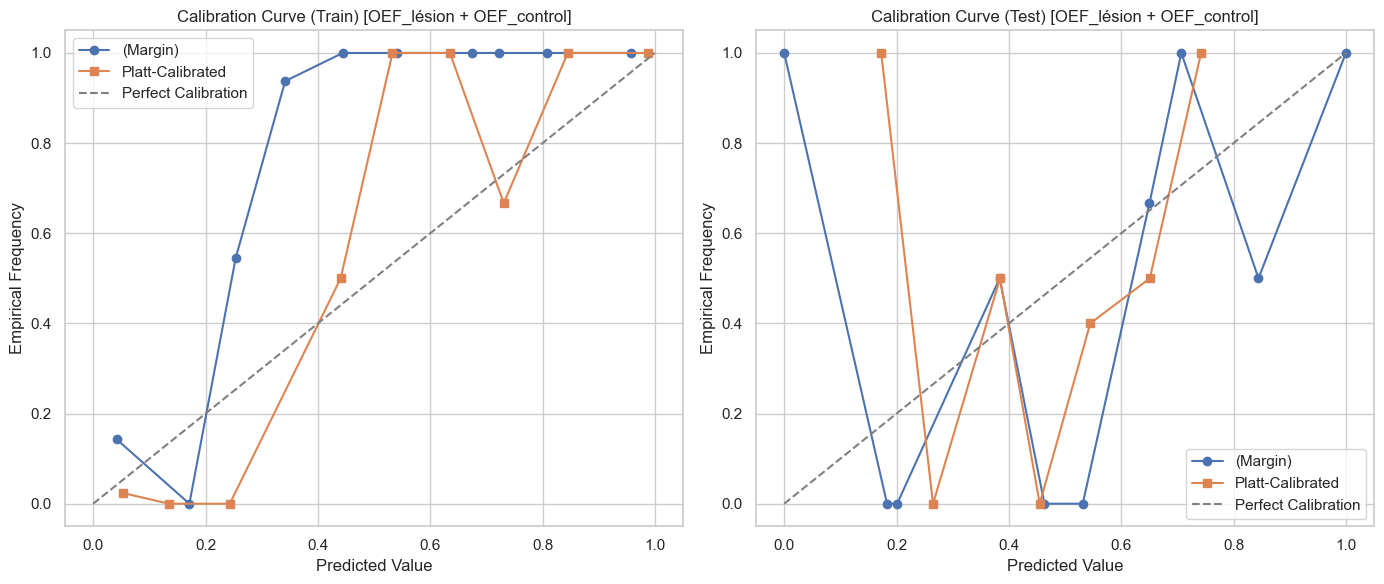

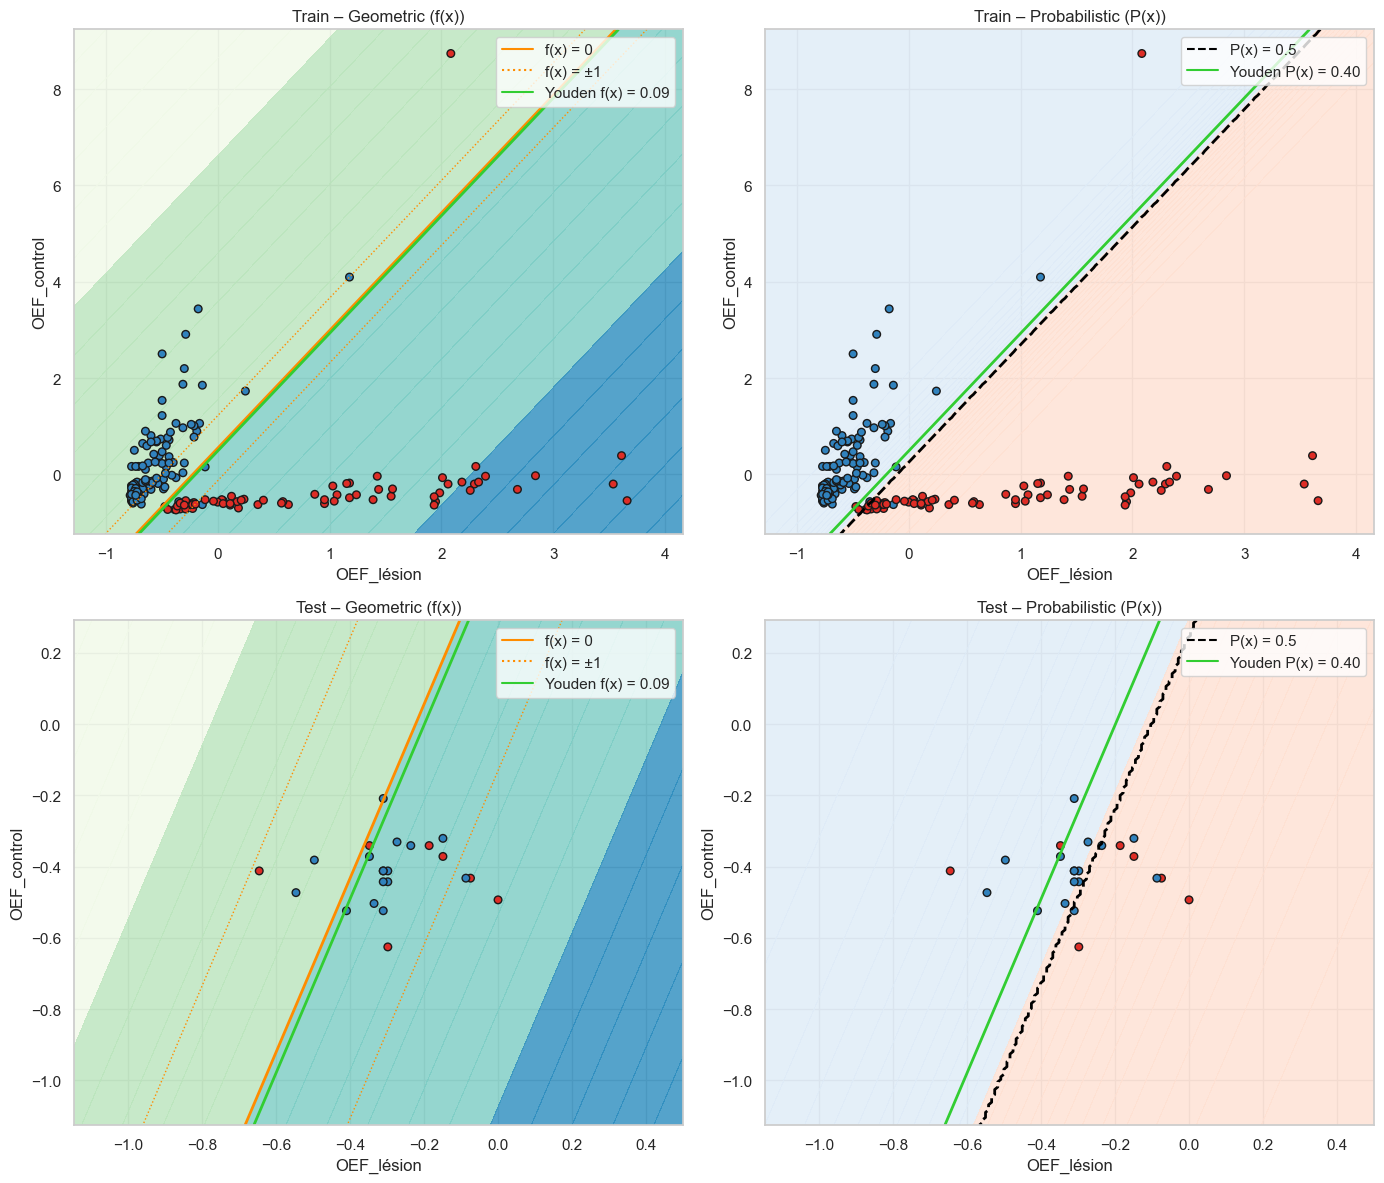

In [22]:
ub.evaluate_svm_bivariate_model(kernel="linear")

SVM (RBF) BIVARIATE: OEF_lésion + OEF_control
----------------------------------------------------------------------------------------------------
[Margin] Train AUC : 0.994 (95% CI: 0.983 – 1.000)
[Margin] Test  AUC : 0.688 (95% CI: 0.371 – 1.000)
Optimal Margin Cutoff (Youden): 0.323
----------------------------------------------------------------------------------------------------
[Proba]  Train AUC : 0.994 (95% CI: 0.983 – 1.000)
[Proba]  Test  AUC : 0.688 (95% CI: 0.371 – 1.000)
Optimal Proba  Cutoff (Youden): 0.700

▶ [OEF_LÉSION + OEF_CONTROL] TRAIN @ F(X) ≥ 0
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      98.9
Recall (Sensitivity) |     100.0
Specificity          |      98.2
Precision            |      97.3
F1 Score             |      98.6

▶ [OEF_LÉSION + OEF_CONTROL] TRAIN @ F(X) ≥ YOUDEN
--------------------------------------------------
Metric               

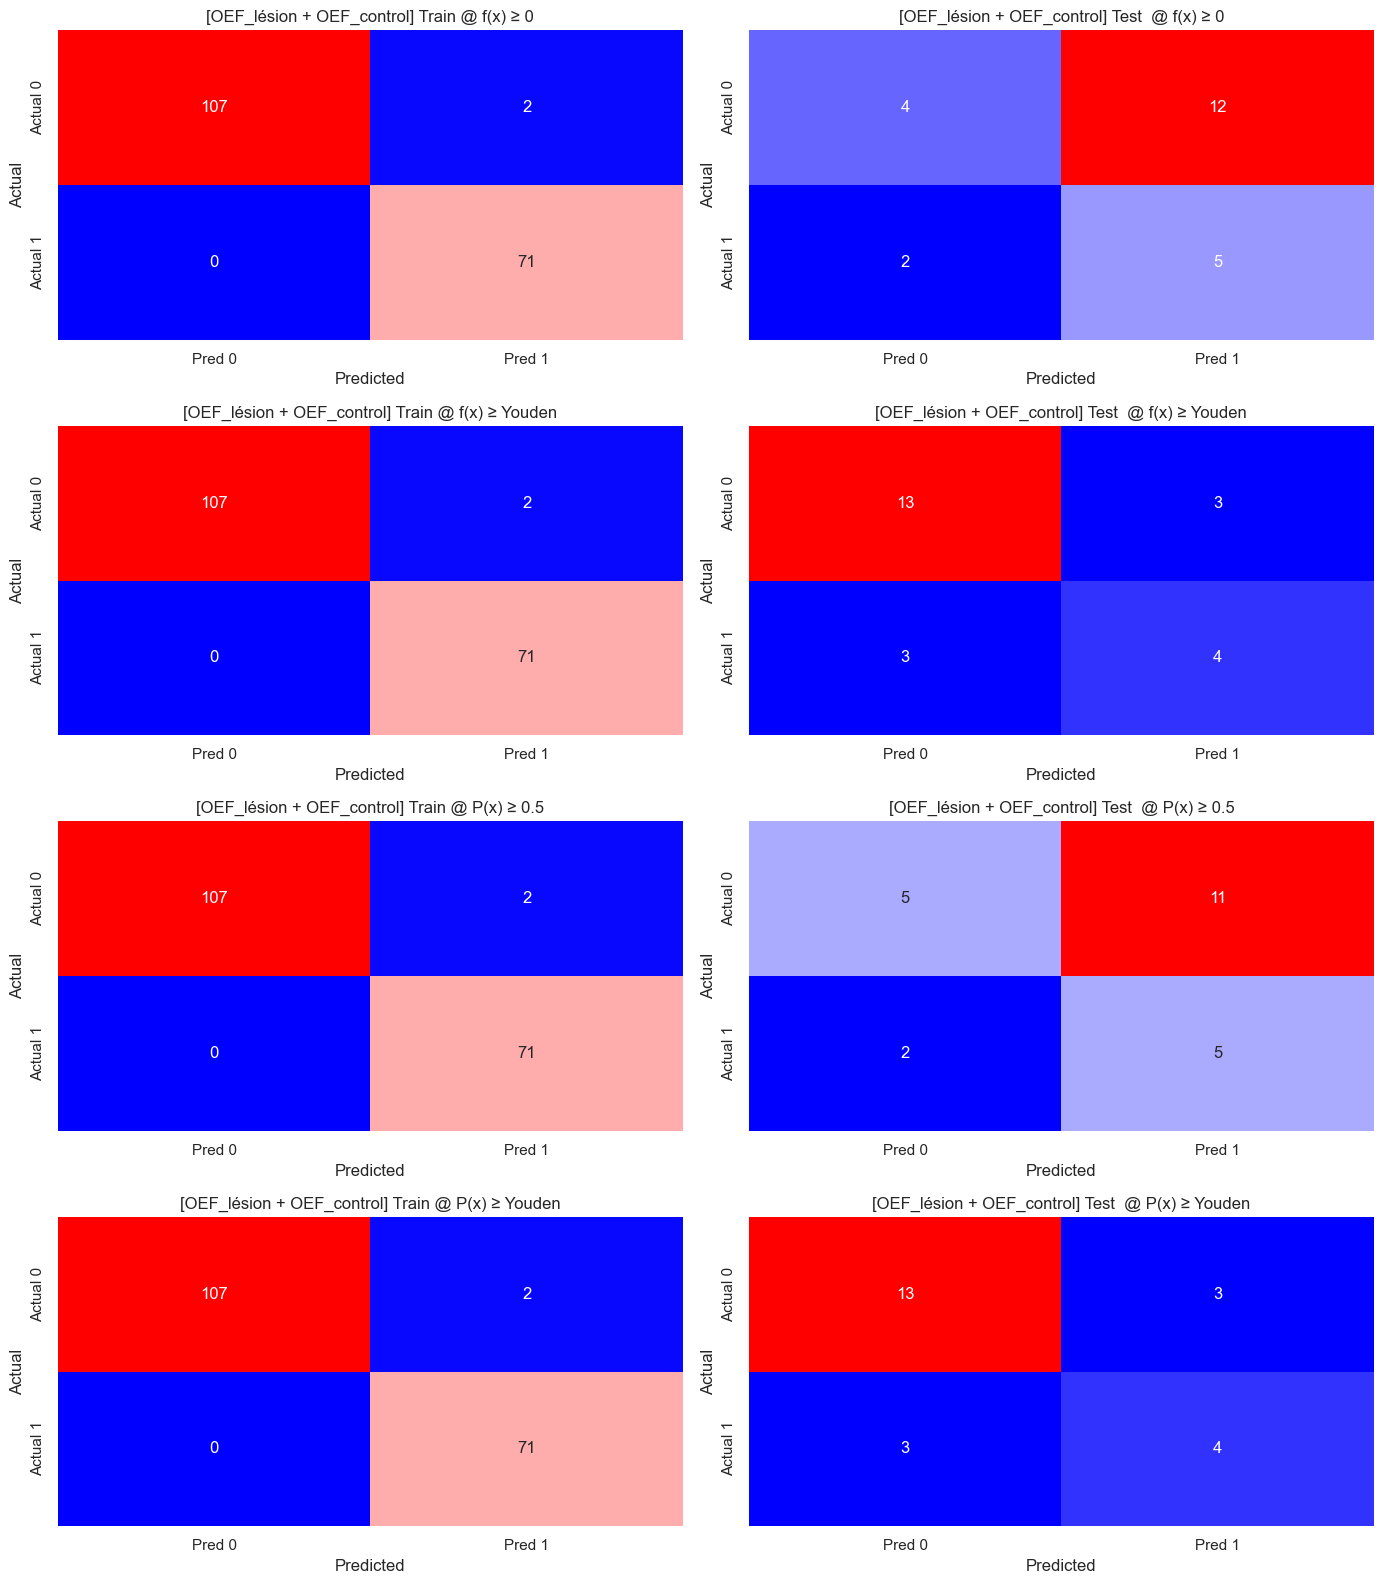

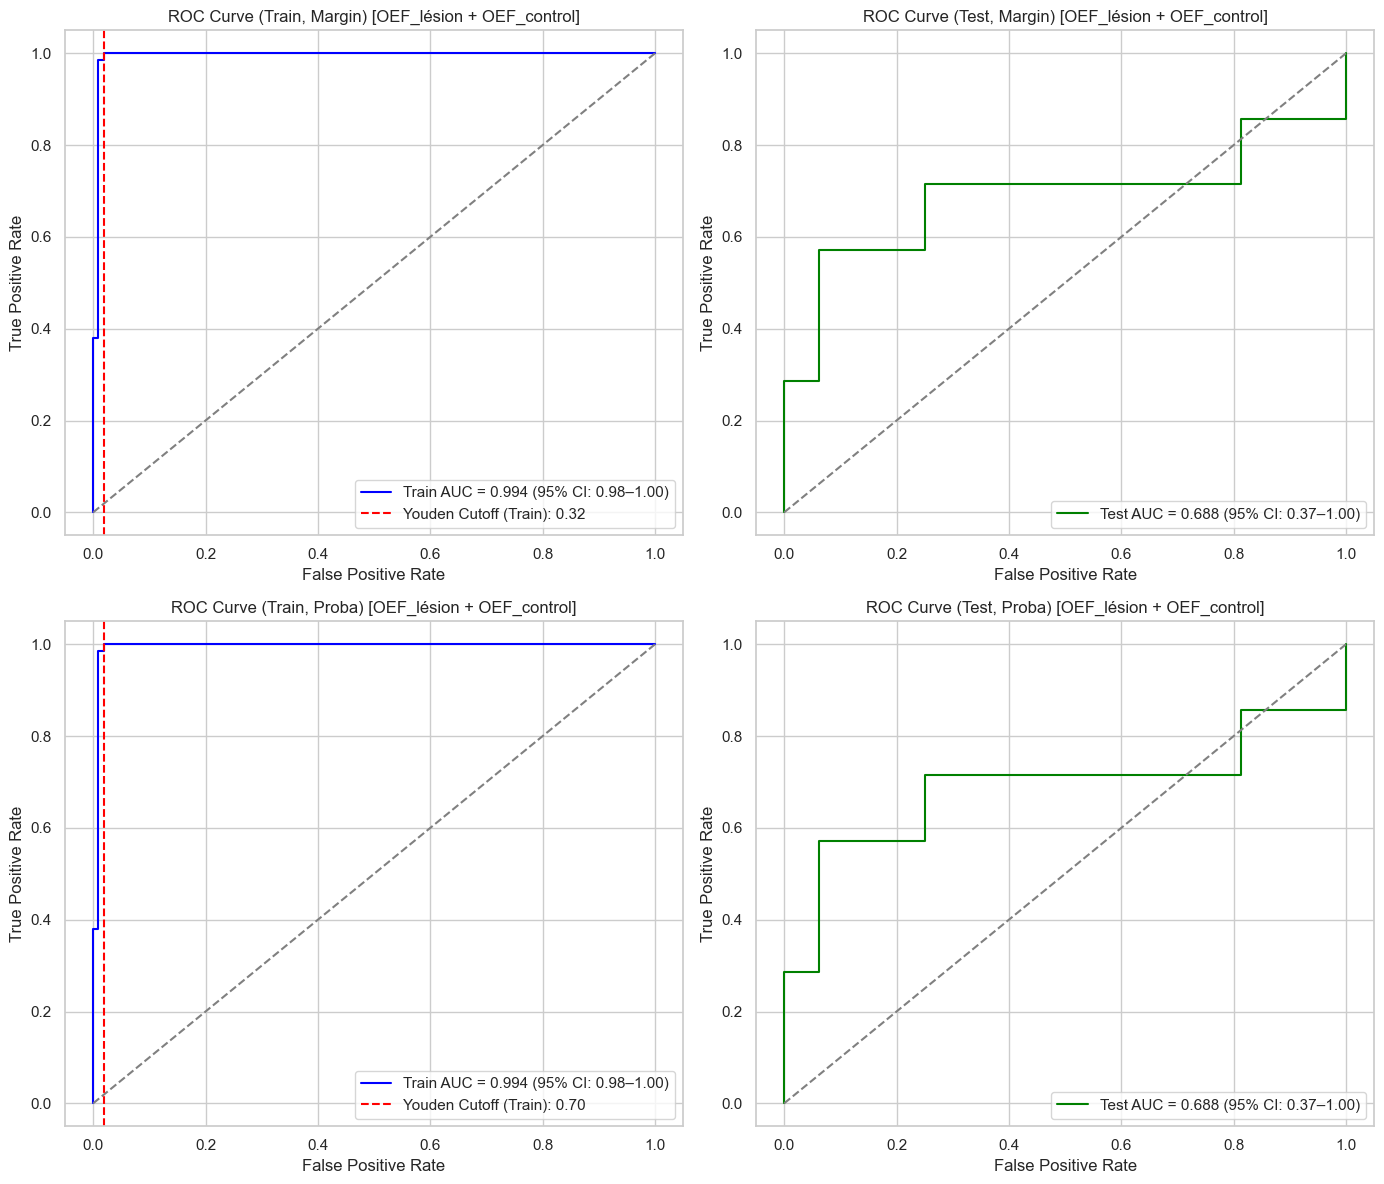

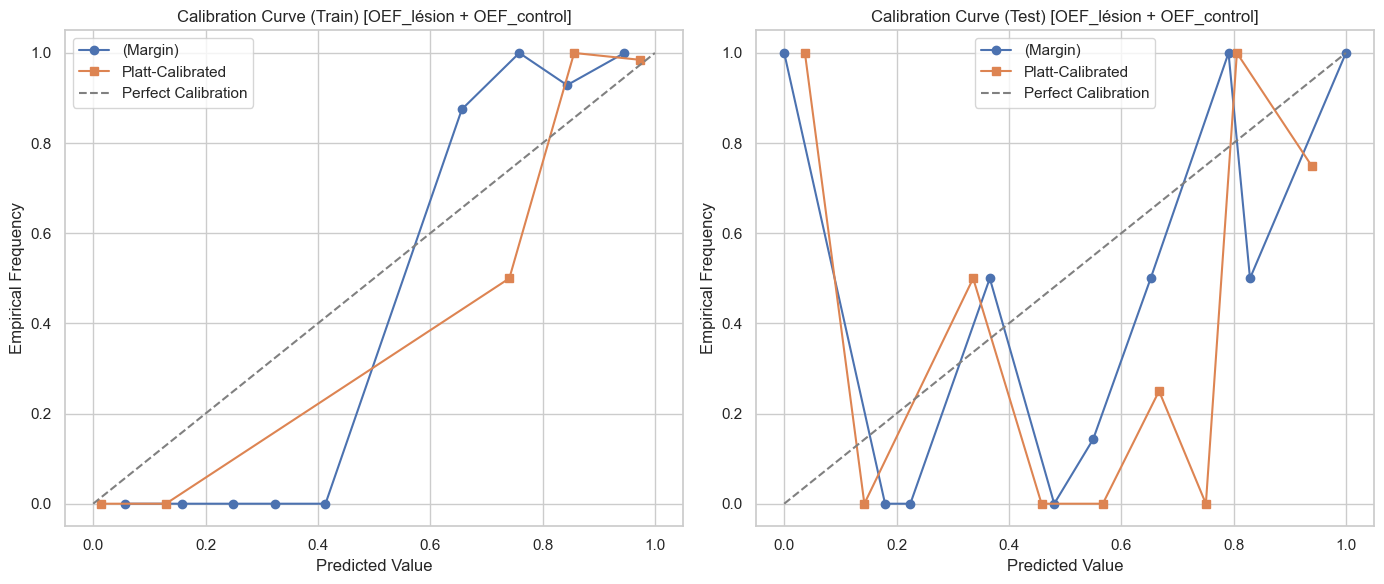

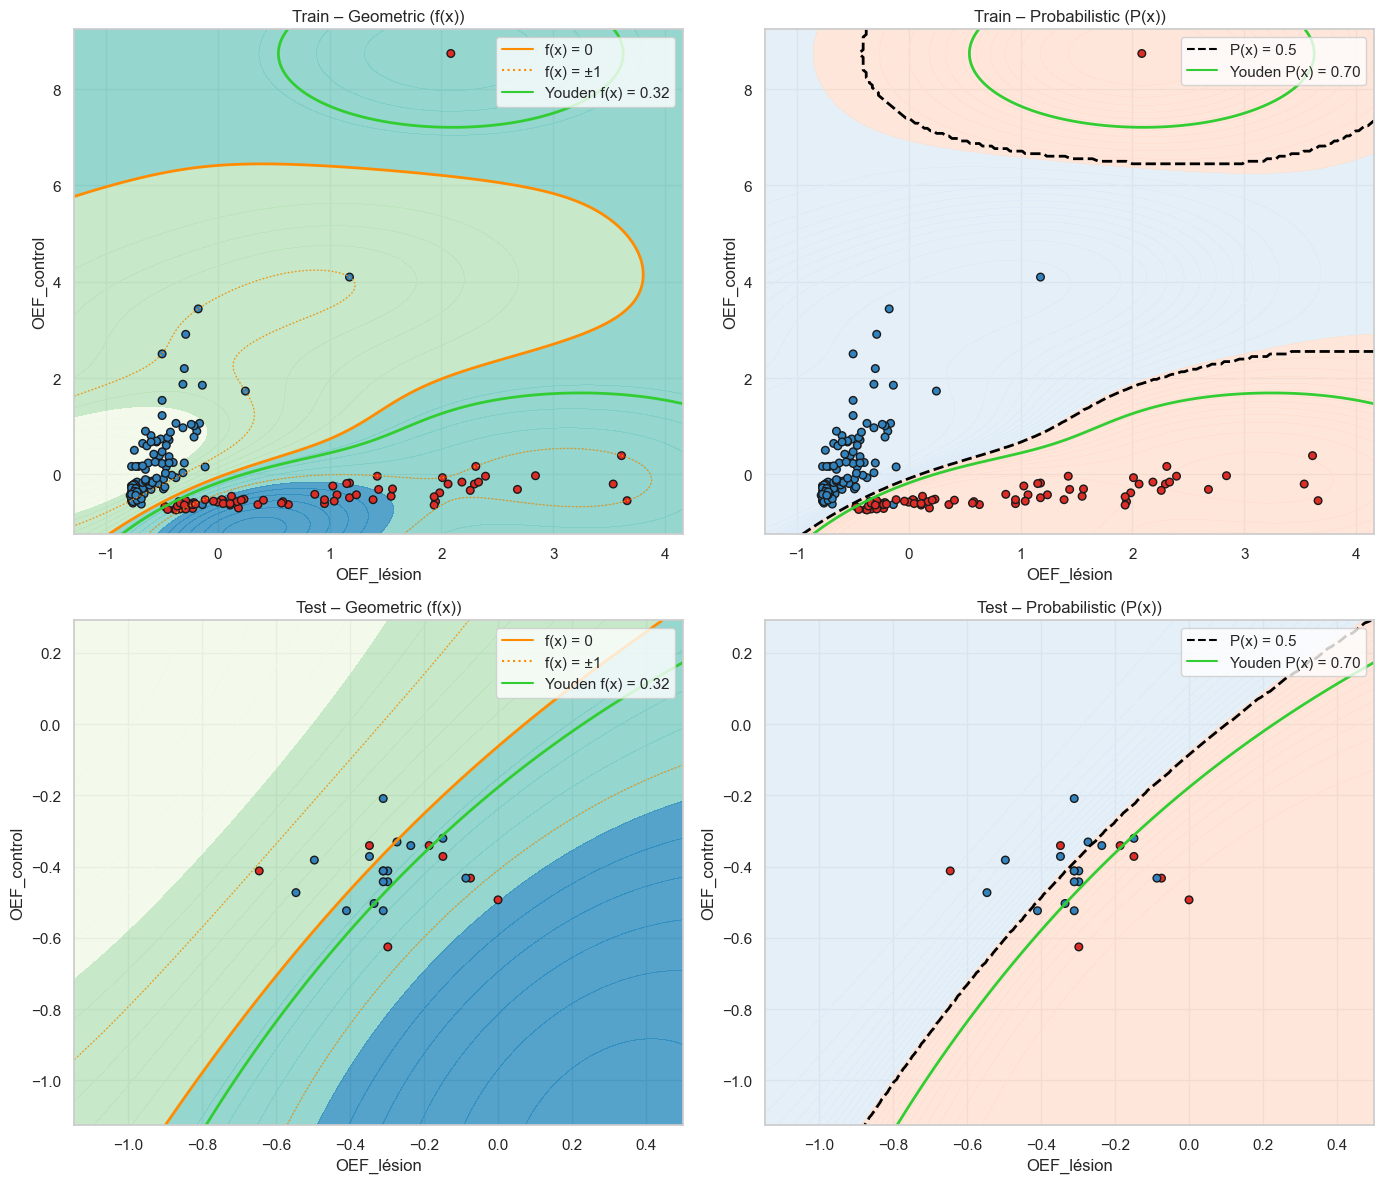

In [23]:
ub.evaluate_svm_bivariate_model(kernel="rbf")

## 6.  Decision Tree Modelling

DECISION TREE (max_depth=3, criterion=GINI): OEF_lésion + OEF_control + OEF_ratio
----------------------------------------------------------------------------------------------------
AUC (Train): 1.000 (95% CI: 0.999 – 1.000)
AUC (Test) : 0.643 (95% CI: 0.462 – 0.824)
----------------------------------------------------------------------------------------------------

▶ [OEF_LÉSION + OEF_CONTROL + OEF_RATIO] TRAIN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      99.4
Recall (Sensitivity) |     100.0
Specificity          |      99.1
Precision            |      98.6
F1 Score             |      99.3

▶ [OEF_LÉSION + OEF_CONTROL + OEF_RATIO] TEST
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      78.3
Recall (Sensitivity) |      28.6
Specificity          |     100.0

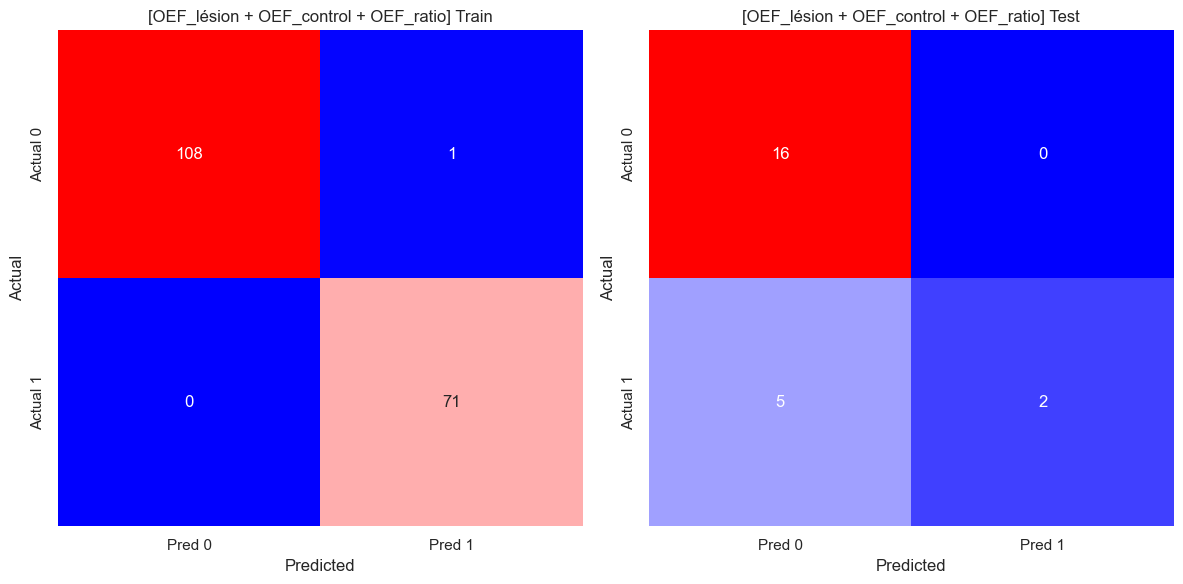

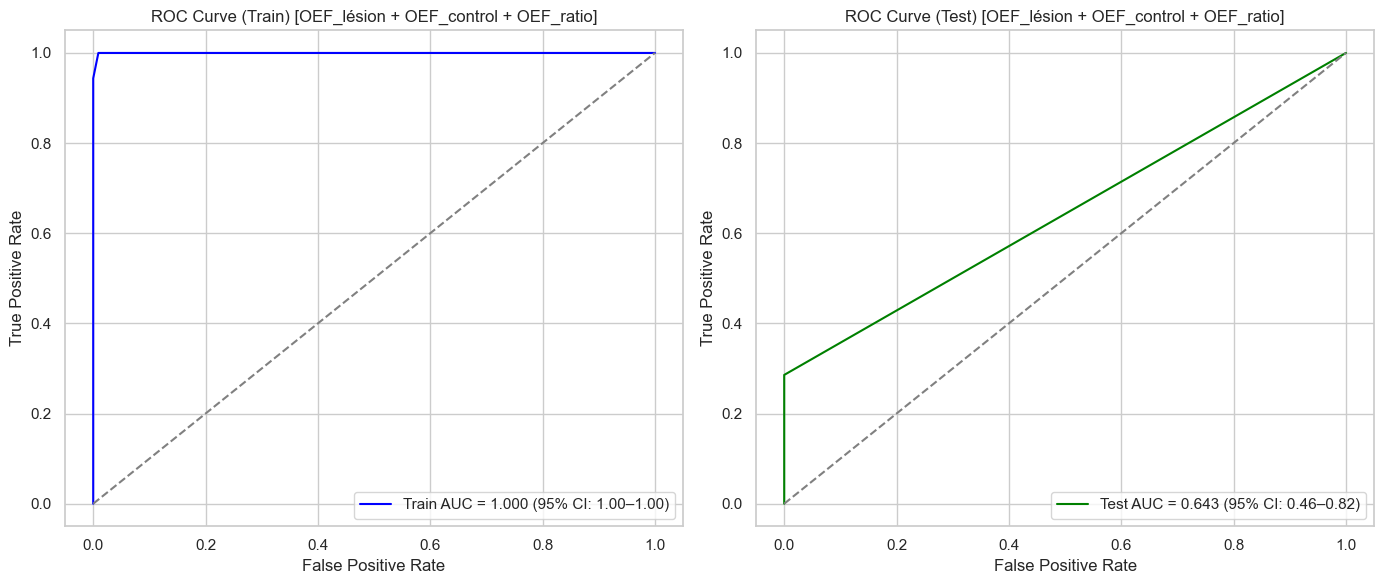

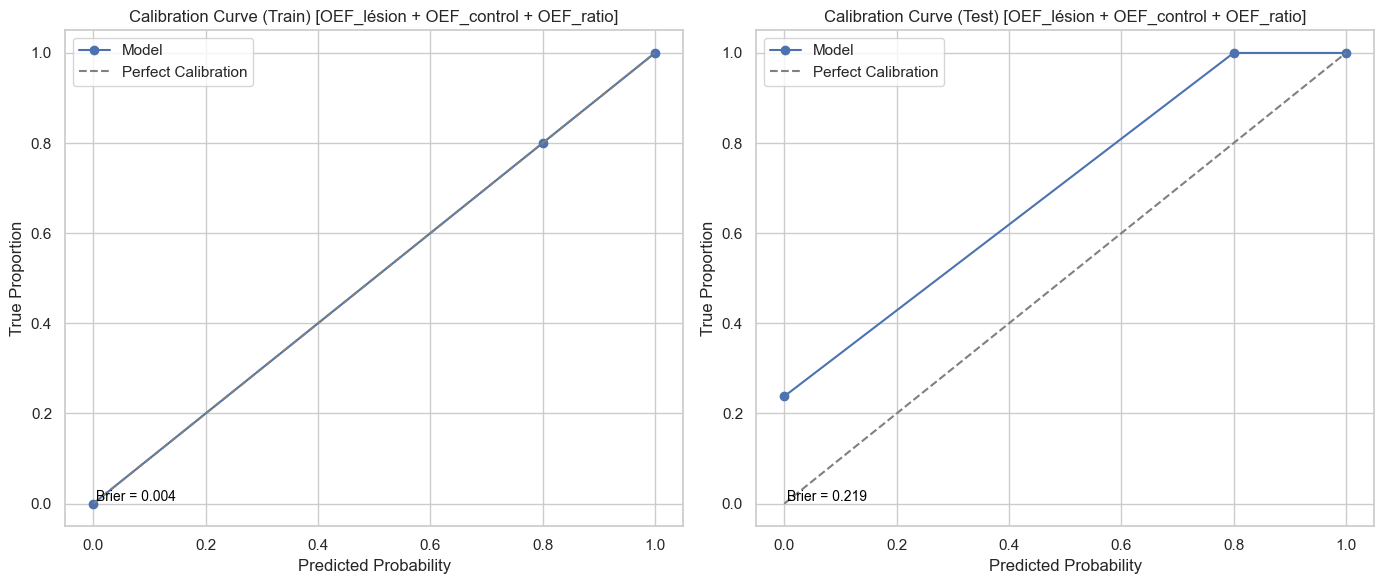

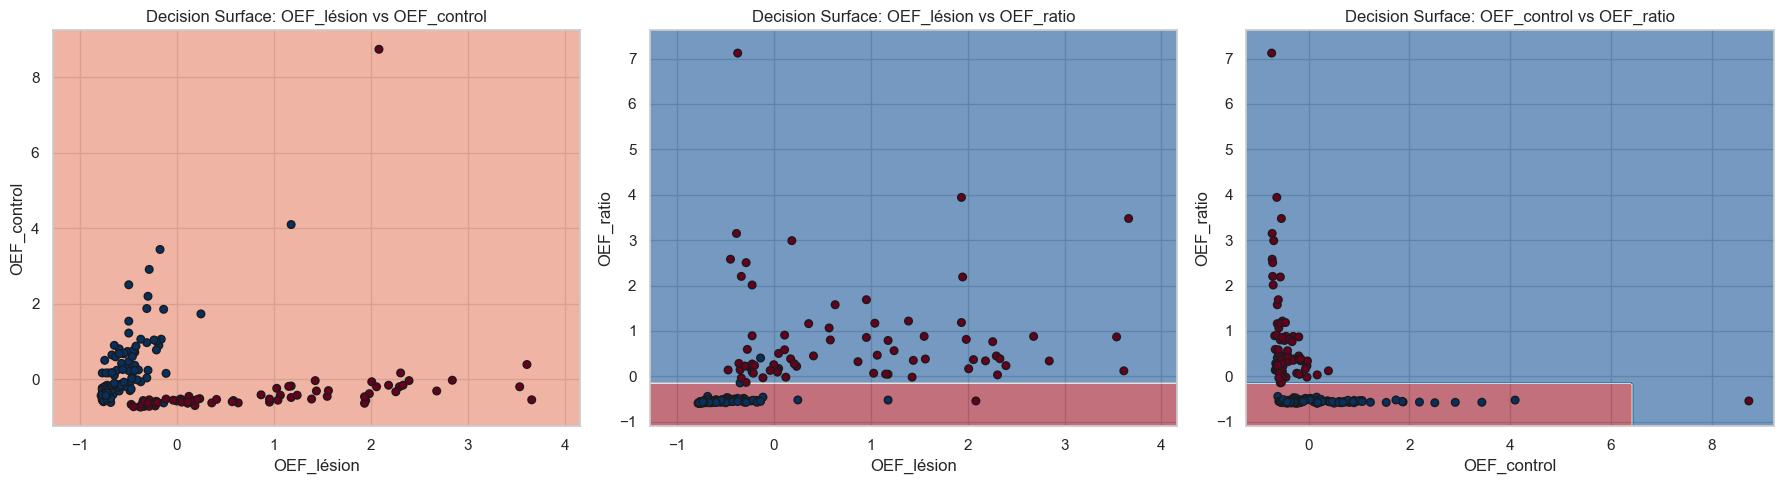

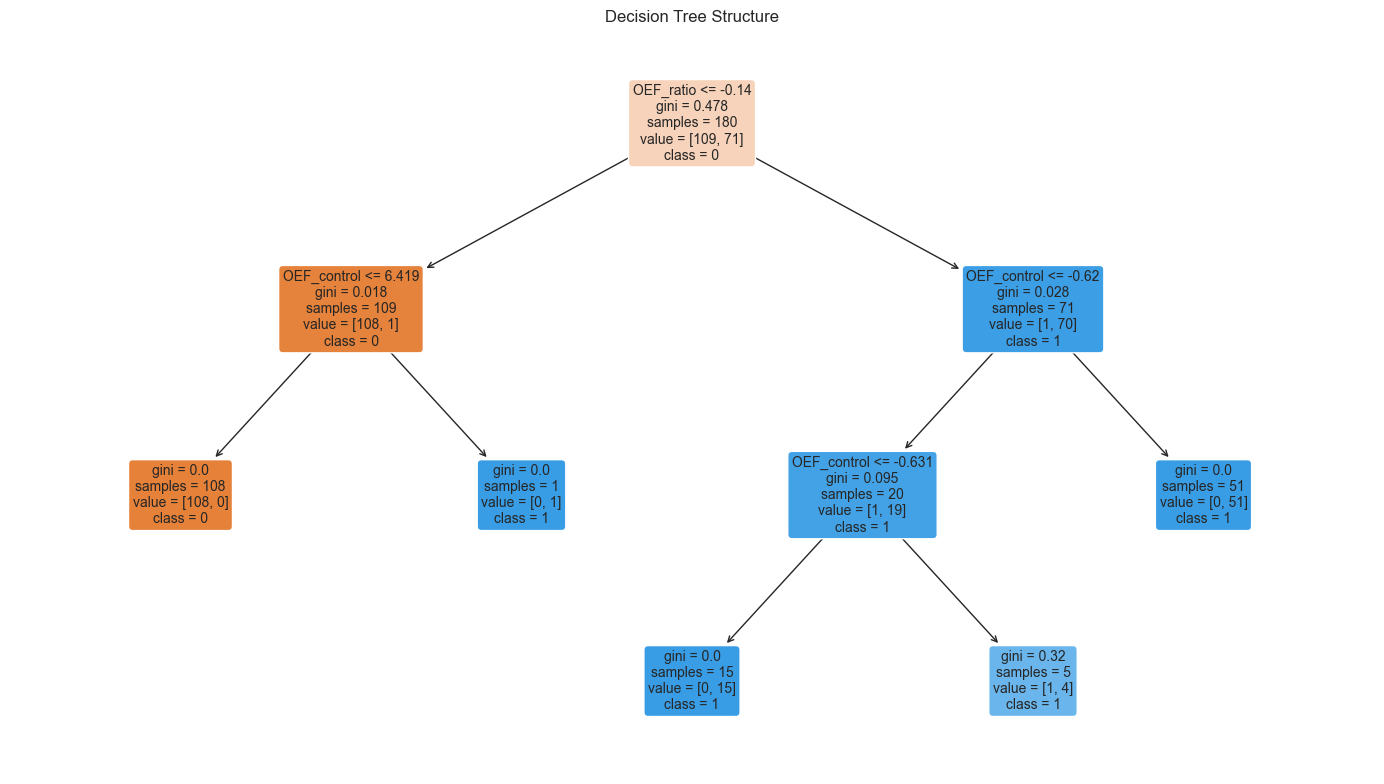


Tree Rules :
--------------------------------------------------------------------------------
|--- OEF_ratio <= -0.14
|   |--- OEF_control <= 6.42
|   |   |--- class: 0
|   |--- OEF_control >  6.42
|   |   |--- class: 1
|--- OEF_ratio >  -0.14
|   |--- OEF_control <= -0.62
|   |   |--- OEF_control <= -0.63
|   |   |   |--- class: 1
|   |   |--- OEF_control >  -0.63
|   |   |   |--- class: 1
|   |--- OEF_control >  -0.62
|   |   |--- class: 1



In [24]:
ub.evaluate_tree_trivariate_model()